# <center> Linear fitting of Franke's function </center>

In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import os
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [3]:
def FrankeFunction_noisy(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x)) 
    noise = noise.reshape(len(x),len(x))
    return term1 + term2 + term3 + term4 + noise

In [4]:
def xy_data_2(n):
    x = np.linspace(0,1,n)
    y = np.linspace(0,1,n)
    x,y = np.meshgrid(x,y)
    return x,y

In [5]:
def xy_data(n):
    x = np.sort(np.random.uniform(0, 1, n))
    y = np.sort(np.random.uniform(0, 1, n))
    x,y = np.meshgrid(x,y)
    return x,y

In [6]:
x,y = xy_data(40)
z = FrankeFunction(x,y)

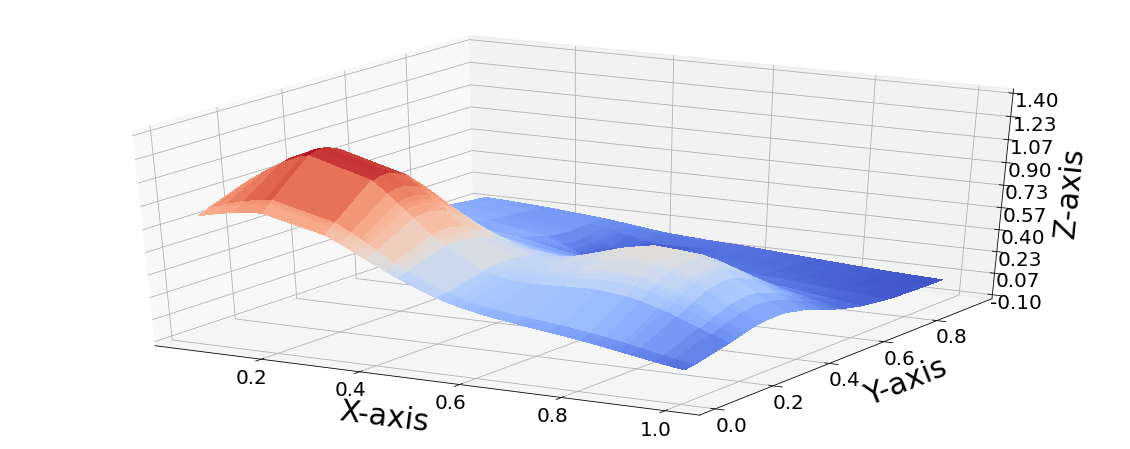

In [7]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
ax.set_zlim(-0.10,1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("Franke function",fontsize="20", color = "black")
fig.savefig("Franke_func.png", dpi=300)


In [8]:
x,y = xy_data_2(40)
z_noise = FrankeFunction_noisy(x,y)

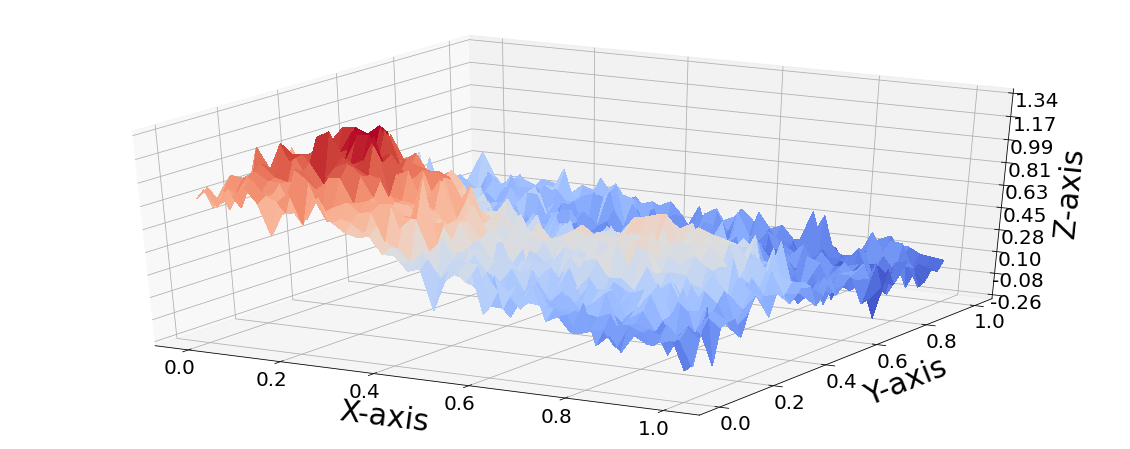

In [9]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z_noise,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
#ax.set_zlim(-0.10,1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("Franke function",fontsize="20", color = "black")
fig.savefig("Franke_func_noise.png", dpi=300)


In [10]:
def make_X_matrix(x,y,n):
    x = x.ravel()
    y = y.ravel()
    length = len(x)
    if n == 1:
        X =np.stack((np.ones(length), x , y), axis=-1)
    elif n == 2:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y), axis=-1)
    elif n == 3:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2)), axis=-1)
    elif n == 4:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3)), axis=-1)
    elif n == 5:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3),x**5, y**5,(x**4)*(y**4)), axis=-1)
    elif n == 6:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3),x**5, y**5,(x**4)*(y**4),x**6, y**6,(x**5)*(y**5)), axis=-1)
    elif n == 7:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3),x**5, y**5,(x**4)*(y**4),x**6, y**6,(x**5)*(y**5),x**7, y**7,(x**6)*(y**6)), axis=-1)
    elif n == 8:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3),x**5, y**5,(x**4)*(y**4),x**6, y**6,(x**5)*(y**5),x**7, y**7,(x**6)*(y**6),x**8, y**8,(x**7)*(y**7)), axis=-1)
    elif n == 9:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3),x**5, y**5,(x**4)*(y**4),x**6, y**6,(x**5)*(y**5),x**7, y**7,(x**6)*(y**6),x**8, y**8,(x**7)*(y**7),x**9, y**9,(x**8)*(y**8)), axis=-1)
    elif n == 10:
        X =np.stack((np.ones(length), x , y , x**2 , y**2 , x*y , x**3 , y**3 ,(x**2)*(y**2),x**4, y**4,(x**3)*(y**3),x**5, y**5,(x**4)*(y**4),x**6, y**6,(x**5)*(y**5),x**7, y**7,(x**6)*(y**6),x**8, y**8,(x**7)*(y**7),x**9, y**9,(x**8)*(y**8),x**10, y**10,(x**9)*(y**9)), axis=-1)
    return X

    

In [11]:
def calc_beta(X,y):
    beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

In [12]:
def predict(x,y,n,beta):
    if n == 1:
        pred =beta[0] + beta[1]* x + beta[2]* y
    elif n == 2:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y
    elif n == 3:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)
    elif n == 4:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)
    elif n == 5:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)+ beta[12]* x**5 + beta[13]* y**5+ beta[14] * (x**4)*(y**4)
    elif n == 6:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)+ beta[12]* x**5 + beta[13]* y**5+ beta[14] * (x**4)*(y**4) + beta[15]* x**6 + beta[16]* y**6 + beta[17] * (x**5)*(y**5)
    elif n == 7:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)+ beta[12]* x**5 + beta[13]* y**5+ beta[14] * (x**4)*(y**4) + beta[15]* x**6 + beta[16]* y**6 + beta[17] * (x**5)*(y**5) + beta[18]* x**7 + beta[19]* y**7 + beta[20] * (x**6)*(y**6)
    elif n == 8:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)+ beta[12]* x**5 + beta[13]* y**5+ beta[14] * (x**4)*(y**4) + beta[15]* x**6 + beta[16]* y**6 + beta[17] * (x**5)*(y**5) + beta[18]* x**7 + beta[19]* y**7 + beta[20] * (x**6)*(y**6) + beta[21]* x**8 + beta[22]* y**8 + beta[23] * (x**7)*(y**7)
    elif n == 9:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)+ beta[12]* x**5 + beta[13]* y**5+ beta[14] * (x**4)*(y**4) + beta[15]* x**6 + beta[16]* y**6 + beta[17] * (x**5)*(y**5) + beta[18]* x**7 + beta[19]* y**7 + beta[20] * (x**6)*(y**6) + beta[21]* x**8 + beta[22]* y**8 + beta[23] * (x**7)*(y**7) + beta[24]* x**9 + beta[25]* y**9 + beta[26] * (x**8)*(y**8)
    elif n == 10:
        pred =beta[0] + beta[1]* x + beta[2]* y + beta[3]* x**2 + beta[4]* y**2 + beta[5] * x*y + beta[6]* x**3 + beta[7]* y**3 + beta[8] * (x**2)*(y**2)+ beta[9]* x**4 + beta[10]* y**4 + beta[11] * (x**3)*(y**3)+ beta[12]* x**5 + beta[13]* y**5+ beta[14] * (x**4)*(y**4) + beta[15]* x**6 + beta[16]* y**6 + beta[17] * (x**5)*(y**5) + beta[18]* x**7 + beta[19]* y**7 + beta[20] * (x**6)*(y**6) + beta[21]* x**8 + beta[22]* y**8 + beta[23] * (x**7)*(y**7) + beta[24]* x**9 + beta[25]* y**9 + beta[26] * (x**8)*(y**8) + beta[27]* x**10 + beta[28]* y**10 + beta[29] * (x**9)*(y**9)
    return pred

## <center> Fitting Franke's function using Ordinary Least Square and Bootstrap resampling </center>

Polynomial degree: 1
Error: 0.03832549558410753
Bias^2: 0.03805973986854668
Var: 0.00011332330412589438
0.03832549558410753 >= 0.03805973986854668 + 0.00011332330412589438 = 0.03817306317267258
Polynomial degree: 2
Error: 0.02929557697542995
Bias^2: 0.02934144212199143
Var: 0.00015301684024859698
0.02929557697542995 >= 0.02934144212199143 + 0.00015301684024859698 = 0.029494458962240025
Polynomial degree: 3
Error: 0.020620218407226824
Bias^2: 0.02053043545895513
Var: 0.00013296648859632235
0.020620218407226824 >= 0.02053043545895513 + 0.00013296648859632235 = 0.020663401947551452
Polynomial degree: 5
Error: 0.015329245750024822
Bias^2: 0.014985545880131096
Var: 0.00019794002465279206
0.015329245750024822 >= 0.014985545880131096 + 0.00019794002465279206 = 0.015183485904783888
Polynomial degree: 6
Error: 0.01400600259306845
Bias^2: 0.014005984922763236
Var: 0.0002085047060429432
0.01400600259306845 >= 0.014005984922763236 + 0.0002085047060429432 = 0.01421448962880618
Polynomial degree: 7


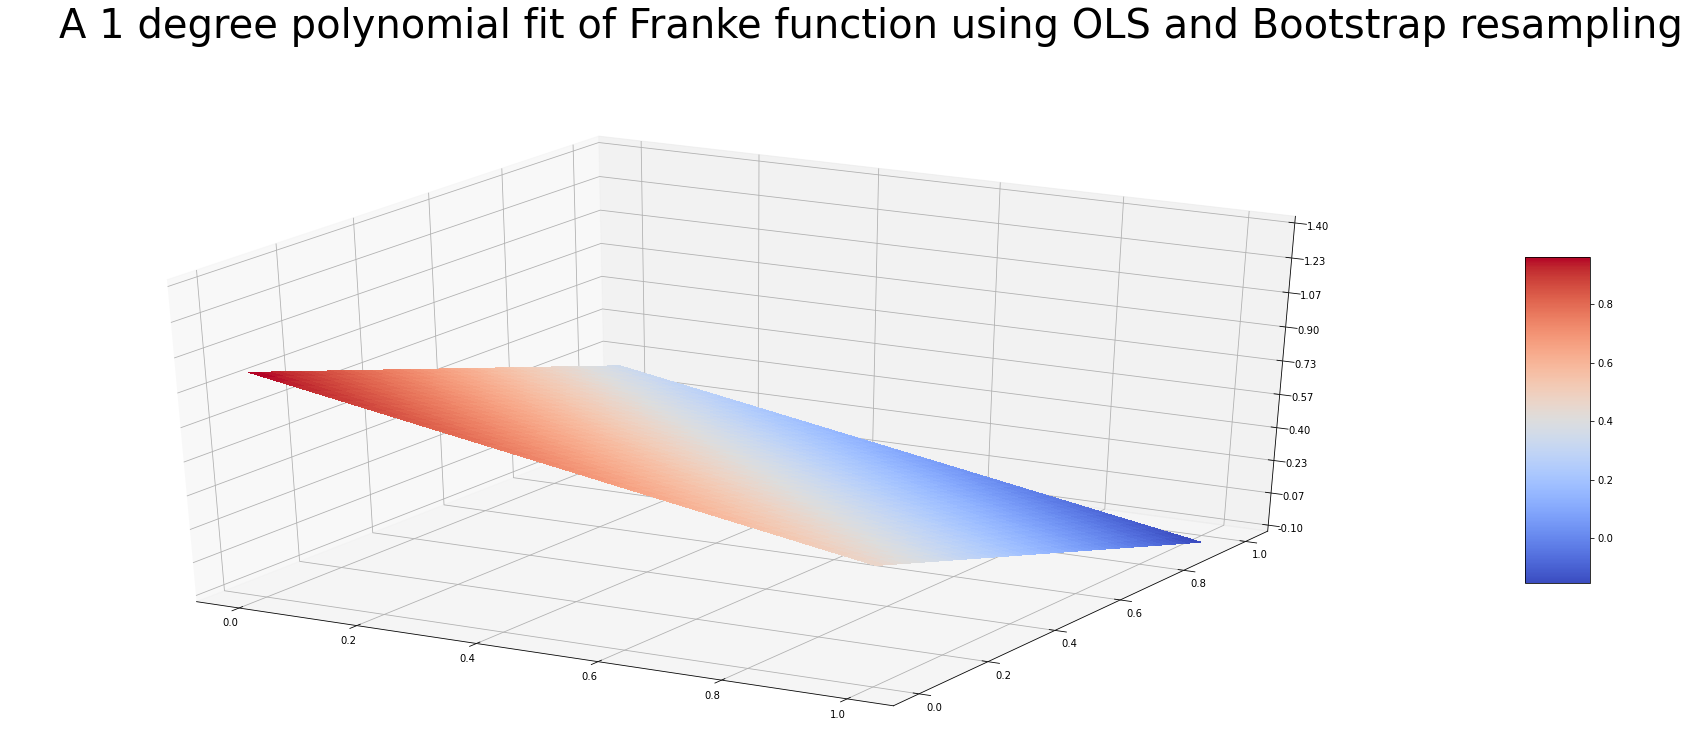

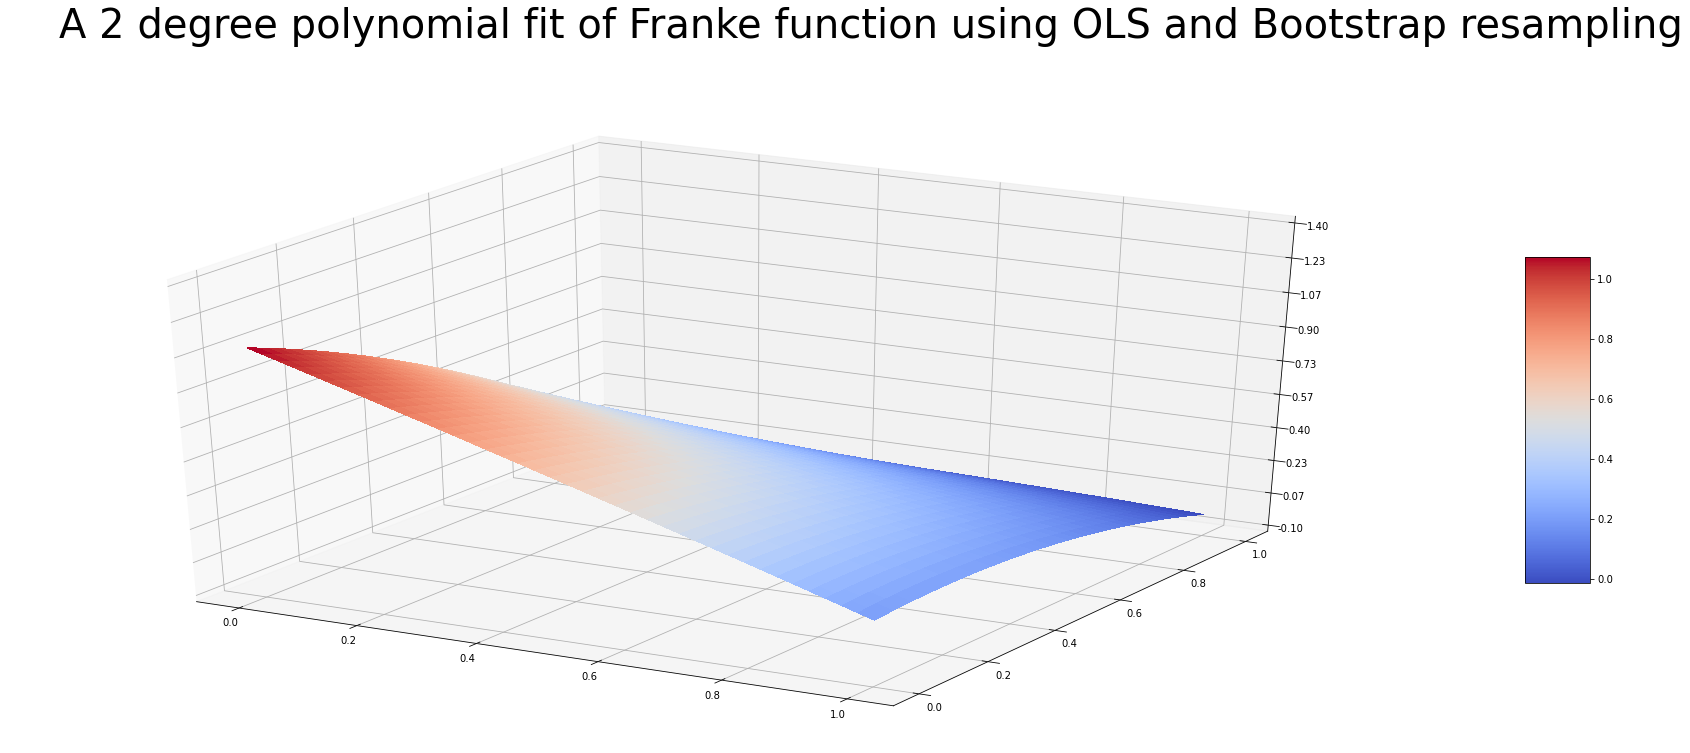

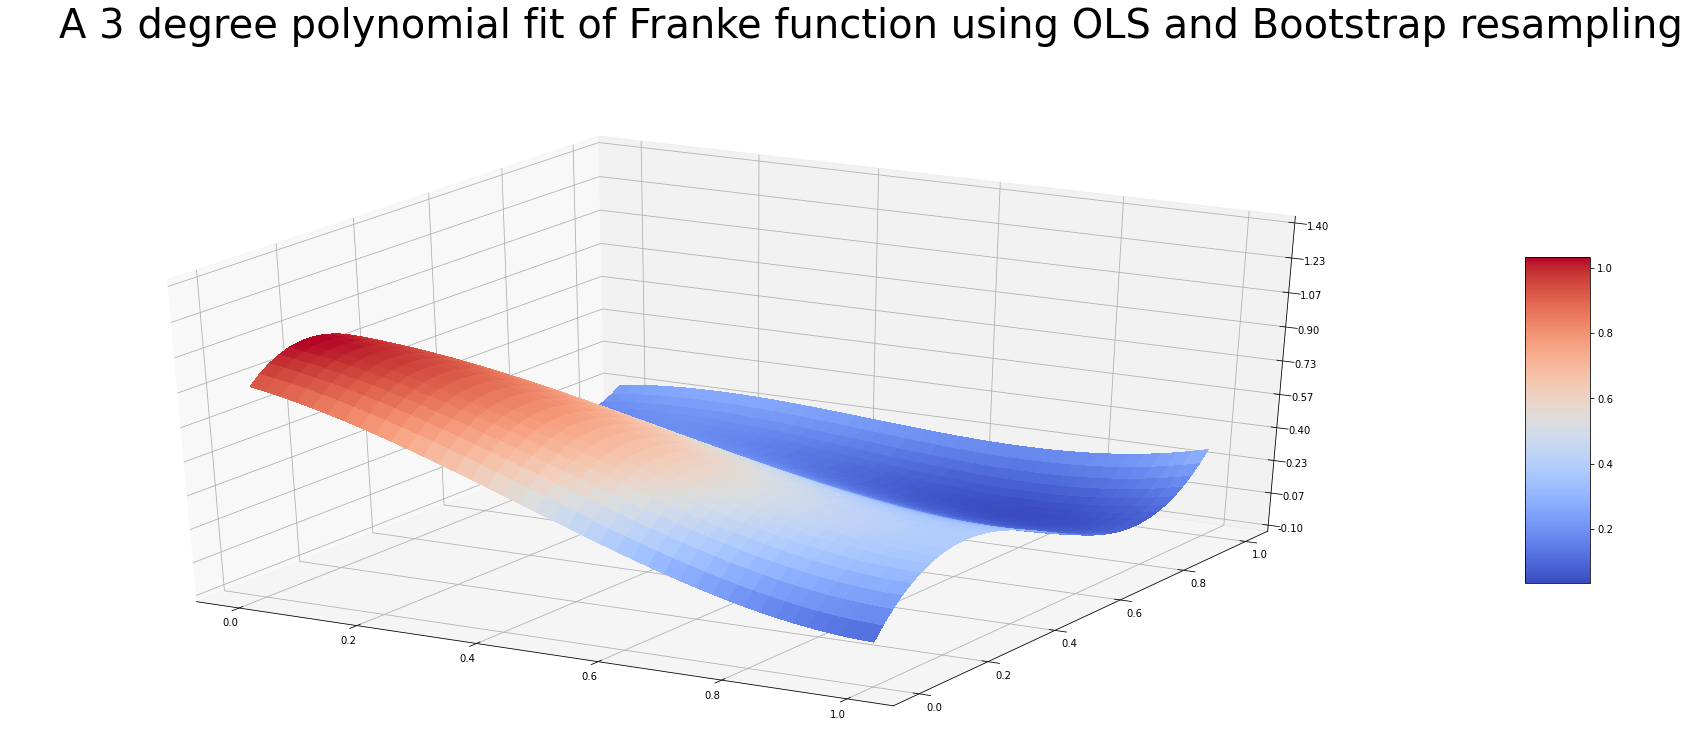

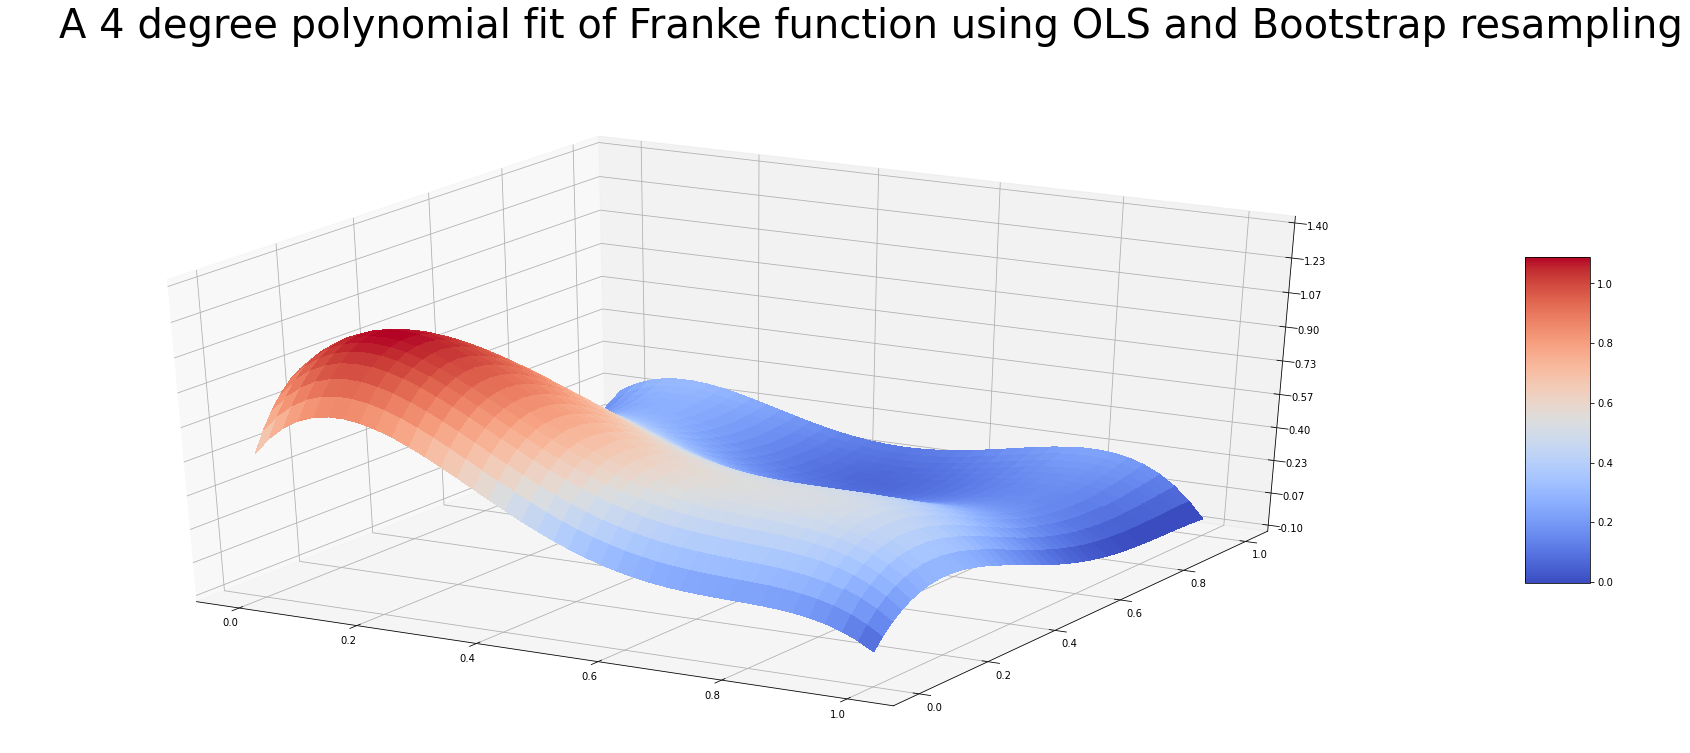

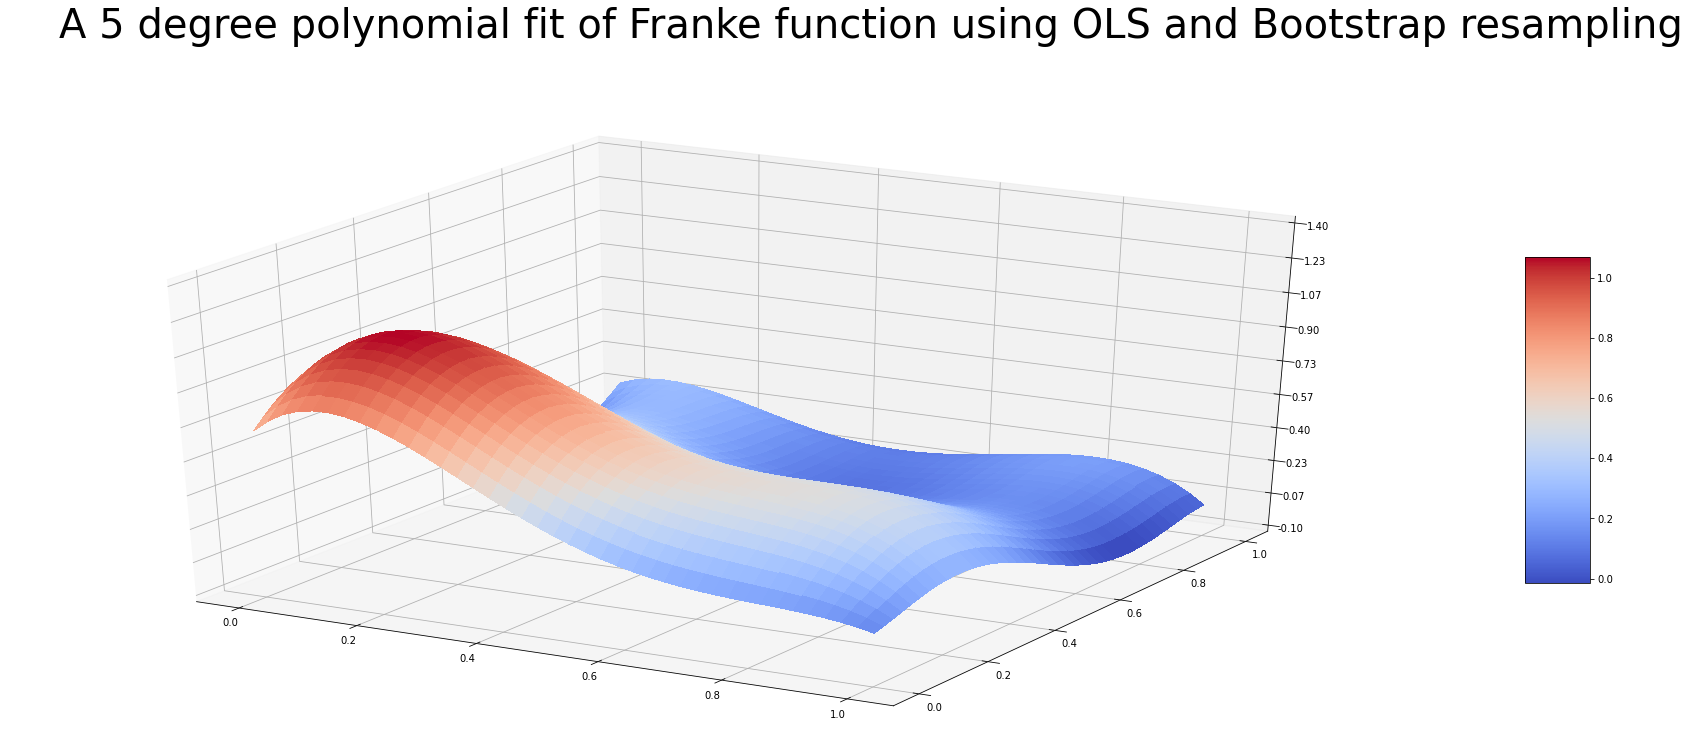

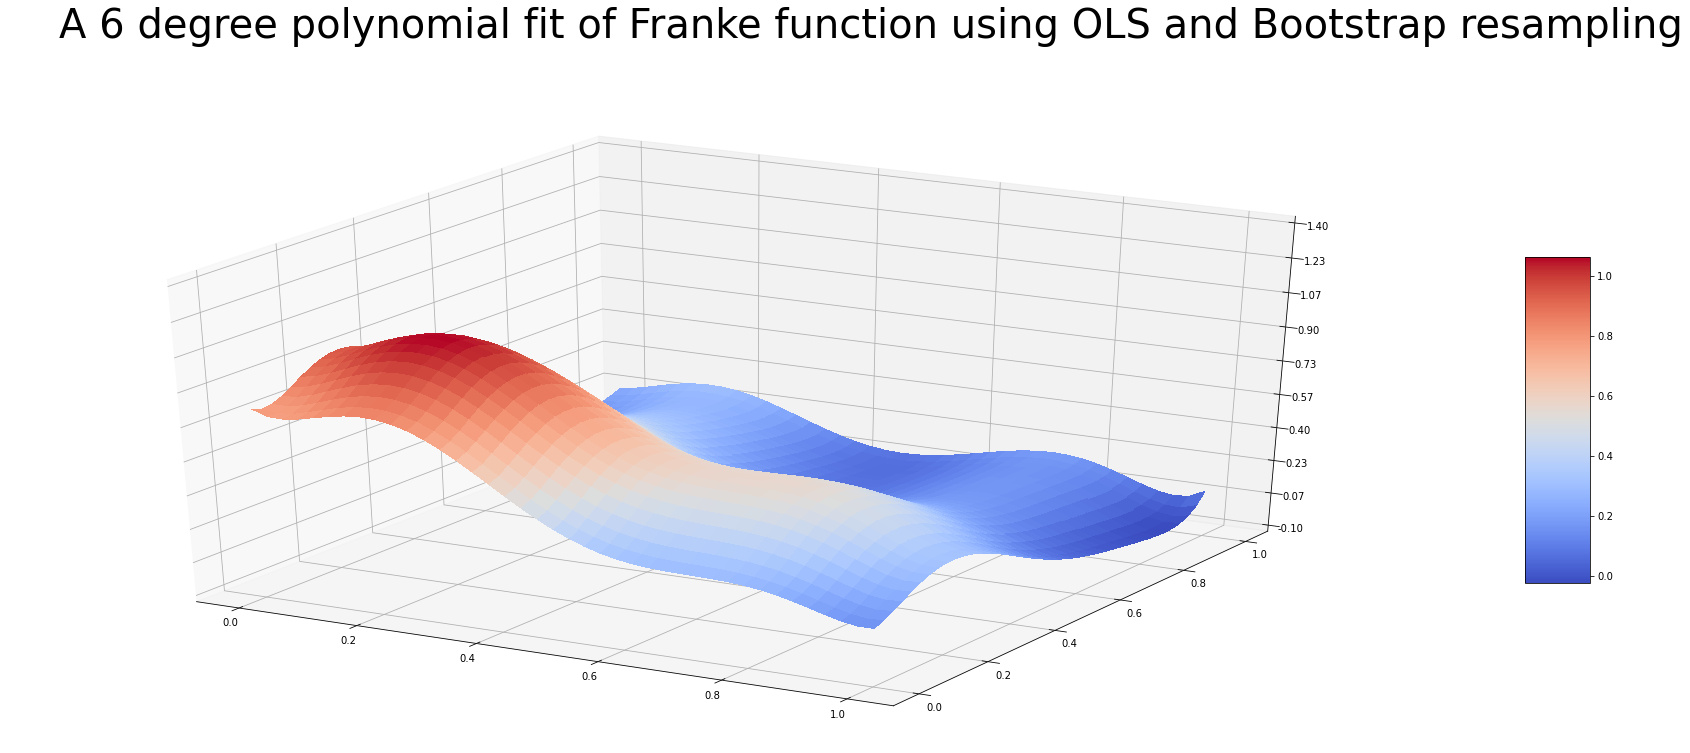

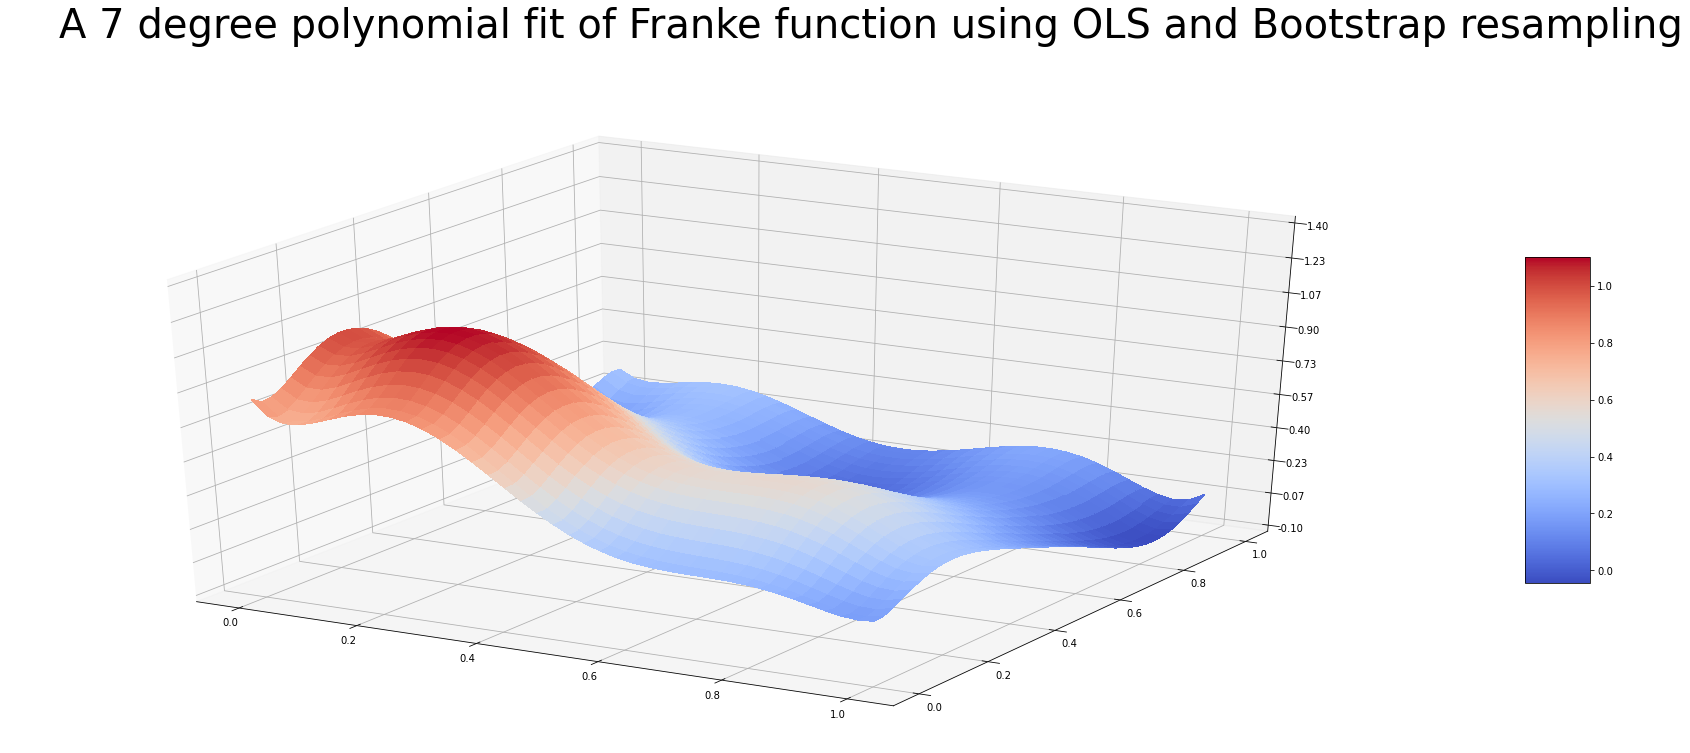

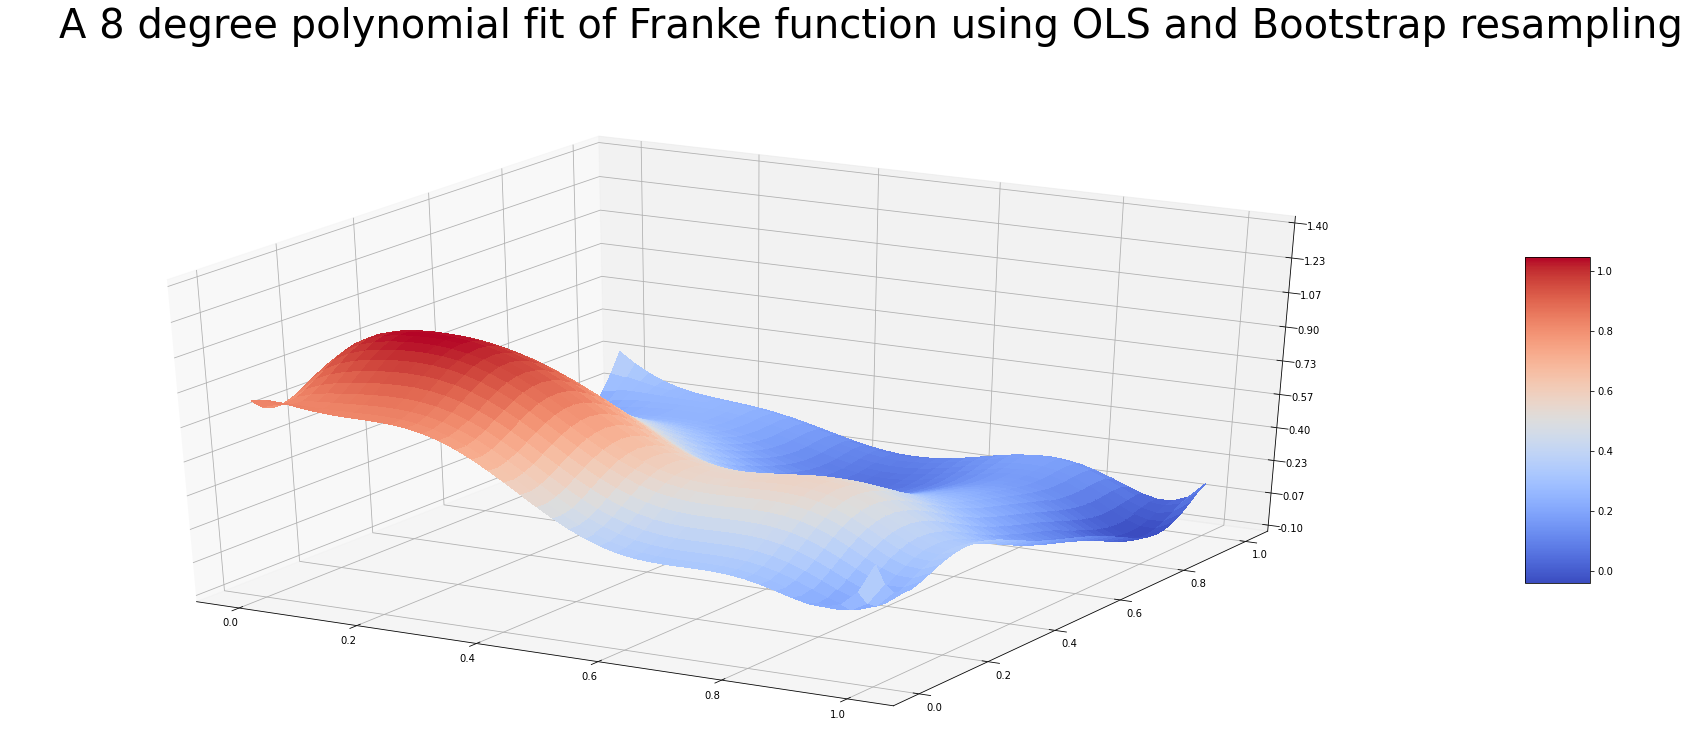

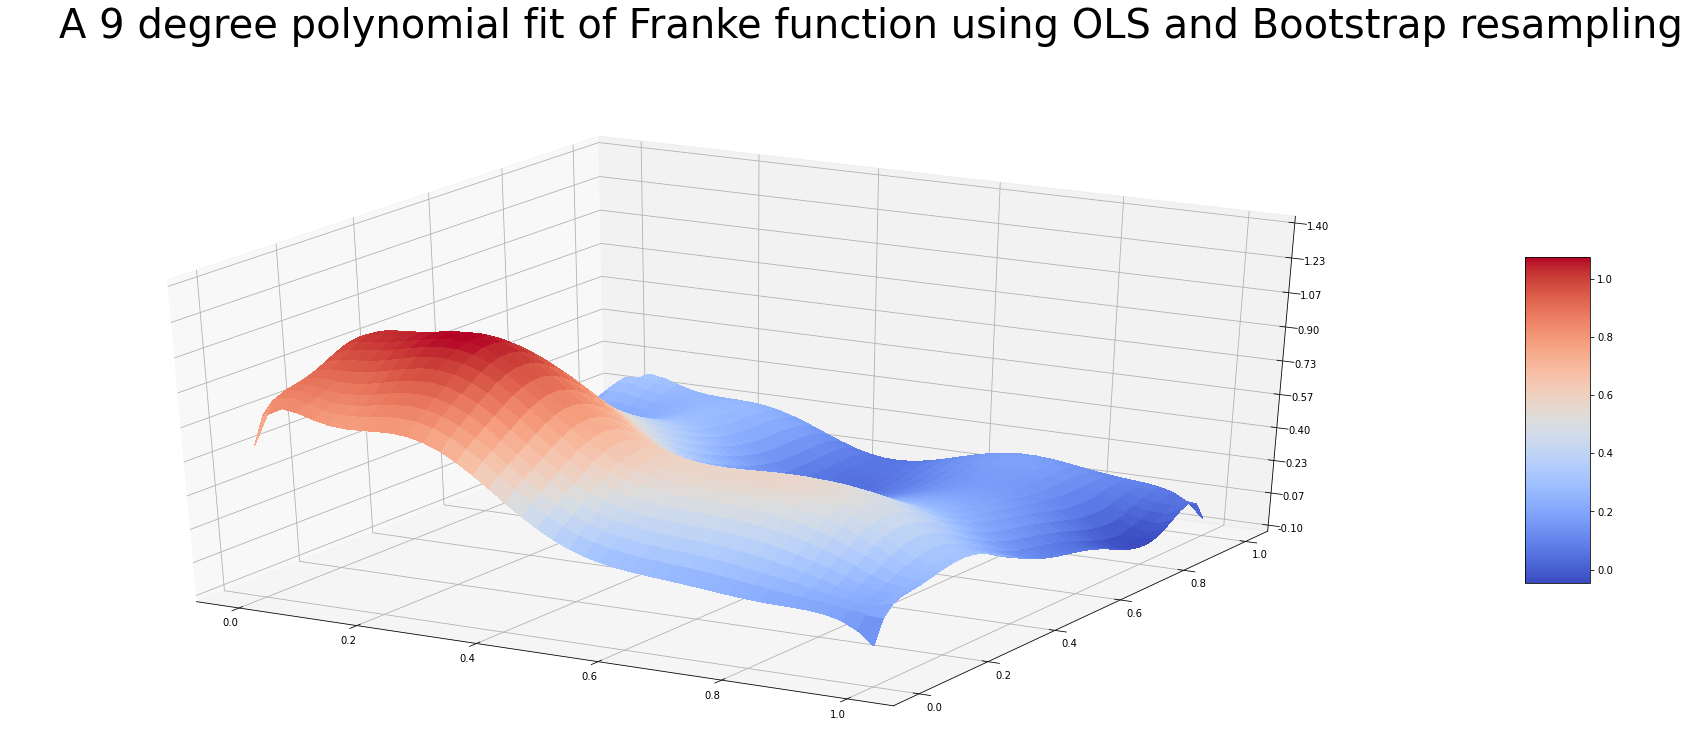

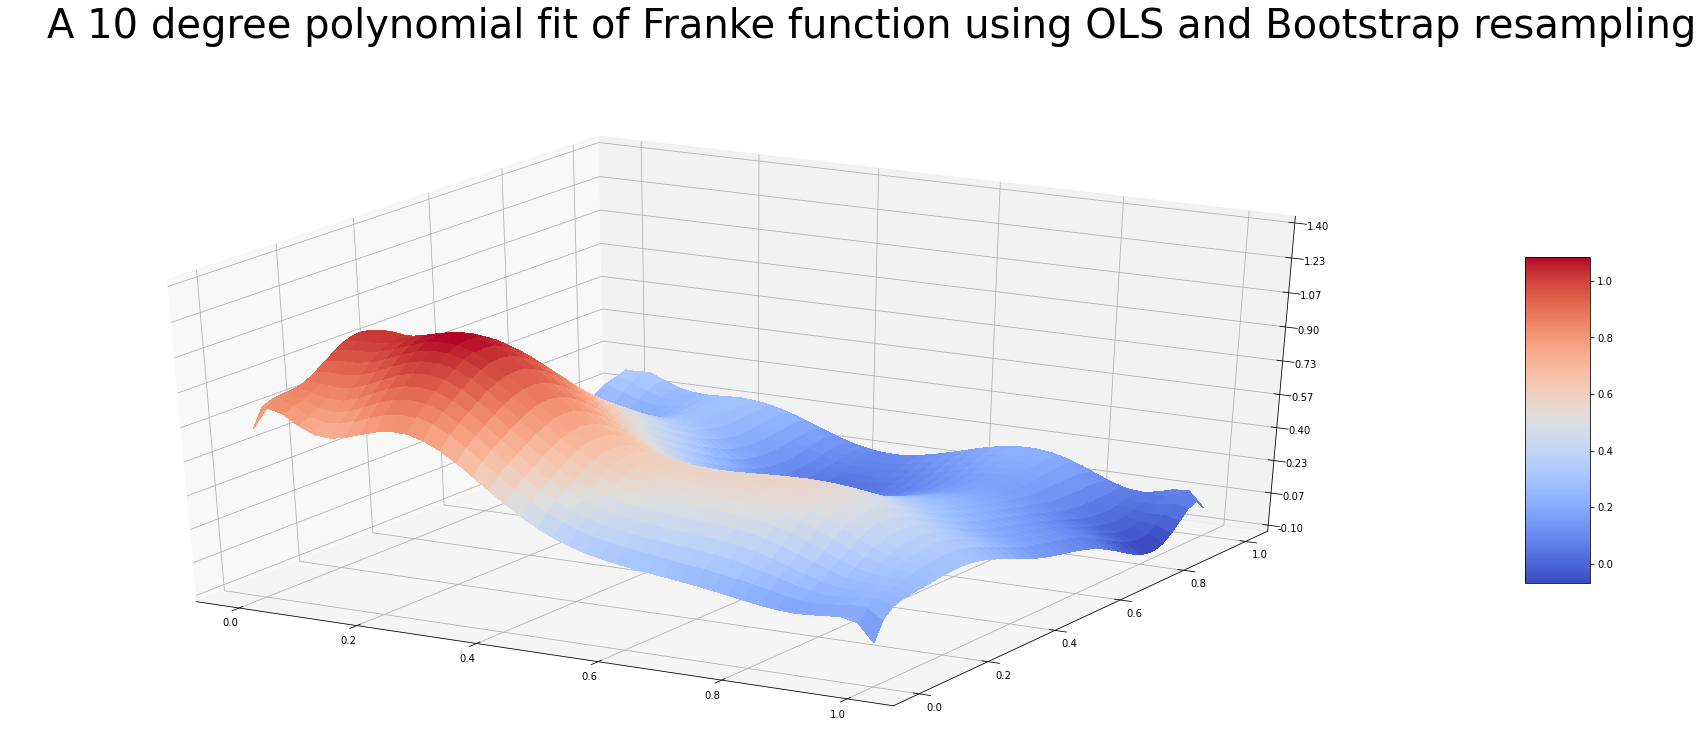

In [13]:
n = 40
n_bootstraps=50
x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)
polynomial = 10


x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
x_and_y_train, x_and_y_test, z_train, z_test = train_test_split(x_and_y,z.ravel(),test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
scaler.fit(x_and_y)


mean_test_error_ols=[]
mean_train_error_ols=[]
all_test_error_ols=[]
all_train_error_ols=[]
all_r2_ols=[]
mean_r2_ols=[]

error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
polydegree = np.zeros(polynomial)
train_error = np.zeros(polynomial)

for poly in range(polynomial):
    r2_ = []
    testing_error=[]
    training_error =[]
    pred_test = np.empty((z_test.shape[0], n_bootstraps))
    pred_train = np.empty((int(z_train.shape[0]*0.9), n_bootstraps))
    for i in range(n_bootstraps):
        
        x_and_y_resampled, z_ = resample(x_and_y_train, z_train,n_samples=int(z_train.shape[0]*0.9))
        
        X_train_scaled = scaler.transform(x_and_y_resampled)
        X_test_scaled = scaler.transform(x_and_y_test)
        
        X = make_X_matrix(X_train_scaled.T[0],X_train_scaled.T[1],poly+1)
        beta = calc_beta(X, z_)
        
        pred_train[:,i] = predict(X_train_scaled.T[0],X_train_scaled.T[1],poly+1,beta).ravel()
        pred_test[:,i]  = predict(X_test_scaled.T[0],X_test_scaled.T[1],poly+1,beta).ravel()
               
        z_pred_train = predict(X_train_scaled.T[0],X_train_scaled.T[1],poly+1,beta).ravel()
        z_pred_test  = predict(X_test_scaled.T[0],X_test_scaled.T[1],poly+1,beta).ravel()
        testing_error.append(mean_squared_error(z_test, z_pred_test))
        training_error.append(mean_squared_error(z_, z_pred_train))
        r2_.append(r2_score(z_test,z_pred_test))

        
    bias[poly] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(pred_test, axis=1, keepdims=True))**2 )
    variance[poly] = np.mean( np.var(pred_test, axis=1, keepdims=True) )
    
    print('Polynomial degree:', poly+1)
    print('Error:', testing_error[poly])
    print('Bias^2:', bias[poly])
    print('Var:', variance[poly])
    print('{} >= {} + {} = {}'.format(testing_error[poly], bias[poly], variance[poly], bias[poly]+variance[poly]))
    
    
    X_plot_scaled = scaler.transform(x_and_y)
    z_plot = z.reshape(n,n)
    z_pred_for_plot = predict(X_plot_scaled.T[0],X_plot_scaled.T[1],poly+1,beta)
    z_plot = z_pred_for_plot.reshape(n,n)
    fig = plt.figure(figsize=(32,12))
    ax = fig.gca(projection ='3d')
    surf = ax.plot_surface(x,y,z_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
    #surf2 = ax.plot_surface(x,y,z_plot,cmap=cm.plasma, linewidth = 0, antialiased=False)
    ax.set_zlim(-0.10,1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of Franke function using OLS and Bootstrap resampling".format(poly+1) ,fontsize="40", color = "black")
    fig.savefig("Franke_function_OLS_bootstrap{}deg_reg.png".format(poly+1))
    fig.show()
        
        
    all_r2_ols.append(r2_)
    mean_r2_ols.append(np.mean(r2_, axis=0))
    mean_test_error_ols.append(np.mean(testing_error))
    mean_train_error_ols.append(np.mean(training_error))
    all_test_error_ols.append(testing_error)
    all_train_error_ols.append(training_error)

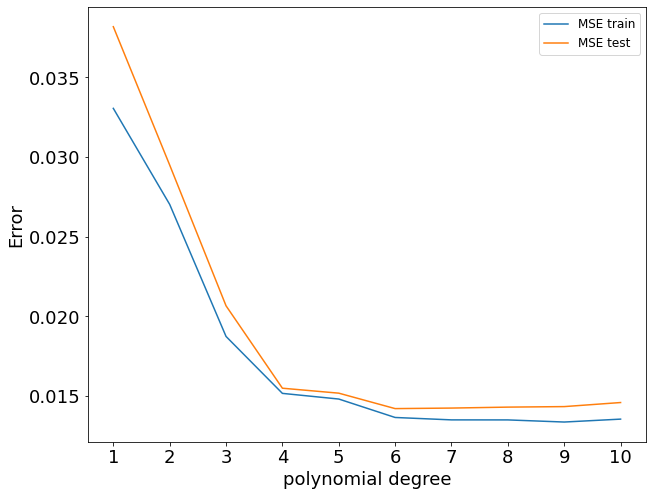

In [14]:
plt.figure(figsize=(10,8))
plt.plot(mean_train_error_ols, label="MSE train")
plt.plot(mean_test_error_ols, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("test_train_mse_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias, label="Bias")
plt.plot(variance, label="Variance")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("bias_variance_mse_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias+variance, label="Bias + Variance")
plt.plot(mean_test_error_ols, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("bias_variance_test_error_mse_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(variance, label="Variance",color="orange")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("variance_mse_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias+variance, label="bias+variance")
plt.plot(mean_test_error_ols, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("bias_variance_error_mse_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(mean_r2_ols, label="R2-score")
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"])
plt.xlabel("polynomial degree")
plt.savefig("R2_score_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(all_r2_ols)
plt.ylabel("R2_score", fontsize=18)
plt.xlabel("polynomial degree", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("boxplot_r2_score_ols_bootstrap_10deg.png", dpi=300)
plt.show()

In [ ]:
all_test_error_ols = np.asarray(all_test_error_ols)
all_train_error_ols = np.asarray(all_train_error_ols)
pos_1=np.ones(all_test_error_ols.shape[0])
pos_2=np.ones(all_test_error_ols.shape[0])
for i in range(all_test_error_ols.shape[0]):
    pos_1[i]=0.5 + i * 2
    pos_2[i]= i *2

plt.figure(figsize=(10,10))
box1 = plt.boxplot(all_test_error_ols.tolist(), positions =pos_1, boxprops=dict(color='red'), medianprops=dict(color='black'))
box2 = plt.boxplot(all_train_error_ols.tolist(), positions = pos_2, boxprops=dict(color='blue'),medianprops=dict(color='black'))
plt.ylabel("Mean Squared Error", fontsize=18)
plt.xlabel("Polynomial degree", fontsize=20)
plt.xticks(ticks = [0,2,4,6,8,10,12,14,16,18], labels = ["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.yticks(fontsize=18)
plt.legend([box1["boxes"][0], box2["boxes"][0]], ['MSE test', 'MSE train'], loc='upper right', fontsize=18)
plt.savefig("boxplot_mse_train_test_ols_bootstrap_10deg.png", dpi=300)
plt.show()

## Scikit-learn OLS with Bootstrap resampling:
source: https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

In [ ]:
n = 40
n_bootstraps=50

x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)


poly = 17

X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
X_train, X_test, z_train, z_test = train_test_split(X,z.ravel(),test_size=0.2, random_state=42)


error = np.zeros(poly)
bias = np.zeros(poly)
variance = np.zeros(poly)
polydegree = np.zeros(poly)
train_error = np.zeros(poly)

mean_test_sk_error_ols=[]
mean_train_sk_error_ols=[]
mean_bias_sk_ols = []
mean_variance_sk_ols = []
mean_r2_sk_ols = []


all_test_sk_error_ols=[]
all_train_sk_error_ols=[]
all_r2_sk_ols=[]

for i in range(poly):
    degree=i + 1
    r2_ = []
    testing_error =[]
    training_error =[]
    pred_test = np.empty((z_test.shape[0], n_bootstraps))
    pred_train = np.empty((int(z_train.shape[0] * 0.9), n_bootstraps)) 
    for j in range(n_bootstraps):
        X_, z_ = resample(X_train, z_train,n_samples=int(z_train.shape[0]*0.9))
        polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
        polyreg.fit(X_,z_)

        
        pred_train[:,j] = polyreg.predict(X_)
        pred_test[:,j]  = polyreg.predict(X_test)
        z_pred_train =  polyreg.predict(X_)
        z_pred_test  = polyreg.predict(X_test)
        testing_error.append(mean_squared_error(z_test, z_pred_test))
        training_error.append(mean_squared_error(z_, z_pred_train))
        r2_.append(r2_score(z_test,z_pred_test))
    train_error[i] = np.mean( np.mean((z_.reshape(z_.shape[0],1) - pred_train)**2, axis=1, keepdims=True) )   
    error[i] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - pred_test)**2, axis=1, keepdims=True) )
    bias[i] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(pred_test, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(pred_test, axis=1, keepdims=True) )

    print('Polynomial degree:', i+1)
    print('Error:', error[i])
    print('Bias^2:', bias[i])
    print('Var:', variance[i])
    print('{} >= {} + {} = {}'.format(error[i], bias[i], variance[i], bias[i]+variance[i]))

        
    z_pred=polyreg.predict(X)
    z_pred_plot = z_pred.reshape(n,n)
    fig = plt.figure(figsize=(32,10))
    ax = fig.gca(projection ='3d')
    surf = ax.plot_surface(x,y,z_pred_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
    #surf2 = ax.plot_surface(x,y,z,cmap=cm.plasma, linewidth = 0, antialiased=False)
    ax.set_zlim(-0.10,1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of Franke function using Sklearn".format(degree) ,fontsize="40", color = "black")
    fig.show()
    
    mean_r2_sk_ols.append(np.mean(r2_))
    

    
    mean_bias_sk_ols.append(np.mean(bias))
    mean_variance_sk_ols.append(np.mean(variance))
    all_r2_sk_ols.append(r2_)
    
    mean_test_sk_error_ols.append(np.mean(testing_error))
    mean_train_sk_error_ols.append(np.mean(training_error))
    all_test_sk_error_ols.append(testing_error)
    all_train_sk_error_ols.append(training_error)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(train_error, label="MSE train")
plt.plot(error, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("mse_train_test_error_SK_17deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias, label="Bias")
plt.plot(variance, label="Variance")
plt.plot(error, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.axvline(x=4,linestyle='--', color='black')
plt.axvline(x=13,linestyle='--',color='black')
plt.savefig("bias_variance_SK_17deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(error, label="MSE test")
plt.plot(bias+variance, label="bias+variance")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("bias_variance_and_test_mse_17deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(mean_r2_sk_ols, label="R2-score")
plt.axvline(x=4,linestyle='--', color='black')
plt.axvline(x=13,linestyle='--',color='black')
plt.legend()
plt.ylabel("R2-score", fontsize = 18)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"],fontsize=18)
plt.xlabel("polynomial degree",fontsize=18)
plt.xticks(fontsize=18)
plt.savefig("R2_score_SK_17deg_ols.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(all_r2_sk_ols)
plt.ylim(-1,1)
plt.ylabel("R2_score", fontsize=18)
plt.xlabel("polynomial degree", fontsize=20)
plt.ylim(0,1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()

In [ ]:
all_test_sk_error_ols = np.asarray(all_test_sk_error_ols)
all_train_sk_error_ols = np.asarray(all_train_sk_error_ols)
pos_1=np.ones(all_test_sk_error_ols.shape[0])
pos_2=np.ones(all_test_sk_error_ols.shape[0])
for i in range(all_test_sk_error_ols.shape[0]):
    pos_1[i]=0.5 + i * 2
    pos_2[i]= i *2

plt.figure(figsize=(30,10))
box1 = plt.boxplot(all_test_sk_error_ols.tolist(), positions =pos_1, boxprops=dict(color='red'), medianprops=dict(color='black'))
box2 = plt.boxplot(all_train_sk_error_ols.tolist(), positions = pos_2, boxprops=dict(color='blue'),medianprops=dict(color='black'))
#box3 = plt.boxplot(all_error_sk_ols_cv_sc,  positions = [-0.5, 1.5, 3.5, 5.5, 7.5], boxprops=dict(color='green'),medianprops=dict(color='black'))
plt.ylim(0,0.1)
plt.ylabel("Mean Squared Error", fontsize=18)
plt.xlabel("Polynomial degree", fontsize=20)
plt.xticks(ticks = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32], labels = ['1 order', '2 order', '3 order','4 order', '5 order','6 order', '7 order', '8 order','9 order', '10 order','11 order', '12 order', '13 order','14 order', '15 order','16 order', '17 order'], fontsize=18)
plt.yticks(fontsize=18)
plt.legend([box1["boxes"][0], box2["boxes"][0]], ['MSE test', 'MSE train'], loc='upper right', fontsize=18)
plt.savefig("mse_boxplot_SK_17deg_ols.png", dpi=300)
plt.show()

# <center> Fitting Franke's function using Ordinary Least Square and cross validation</center>

## My algorithm - Ordinary Least Square and cross validation

In [ ]:
#https://machinelearningmastery.com/implement-resampling-methods-scratch-python/

from random import seed
from random import randrange
 
# Split a dataset into k folds
def cross_validation_split(dataset, folds=10):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [ ]:
n = 40
k_folds = 10
polynomial = 10

x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)

x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(x_and_y)
x_and_y_scaled = scaler.transform(x_and_y)


all_r2_ols_cv=[]
mean_r2_ols_cv=[]
error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
polydegree = np.zeros(polynomial)
train_error = np.zeros(polynomial)





for poly in range(polynomial):
    r2_ = []
    pred_test = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
    pred_train = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds)) 
    data = np.hstack((x_and_y_scaled,z.ravel().reshape(n**2,1)))
    folds = cross_validation_split(data, k_folds)
    for i in range(k_folds):
        n_fold = folds.copy()
        test_data = n_fold.pop(i)
        test_data= np.asarray(test_data)
        
        train_data = np.vstack(n_fold)
        
        z_train = train_data[:,-1]
        xy_train = train_data[:,0:-1]
        
        z_test = test_data[:,-1]
        xy_test = test_data[:,0:-1]
        

        
        X_train = make_X_matrix(xy_train.T[0],xy_train.T[1],poly+1)
        beta = calc_beta(X_train, z_train)
        
        z_pred_test=predict(xy_test.T[0],xy_test.T[1],poly+1,beta)
        z_pred_train=predict(xy_train.T[0],xy_train.T[1],poly+1,beta)
        pred_test[:,i]=predict(xy_test.T[0],xy_test.T[1],poly+1,beta)
        pred_train[:,i]=predict(xy_train.T[0],xy_train.T[1],poly+1,beta)
        r2_.append(r2_score(z_test,z_pred_test))
        
    train_error[poly] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - pred_train)**2, axis=1, keepdims=True) )   
    error[poly] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - pred_test)**2, axis=1, keepdims=True) )
    bias[poly] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(pred_test, axis=1, keepdims=True))**2 )
    variance[poly] = np.mean( np.var(pred_test, axis=1, keepdims=True) )

    print('Polynomial degree:', poly+1)
    print('Error:', error[poly])
    print('Bias^2:', bias[poly])
    print('Var:', variance[poly])
    print('{} >= {} + {} = {}'.format(error[poly], bias[poly], variance[poly], bias[poly]+variance[poly]))
        
        
    z_pred_for_plot = predict(x_and_y_scaled.T[0],x_and_y_scaled.T[1],poly+1,beta)
    fig = plt.figure(figsize=(32,12))
    ax = fig.gca(projection ='3d')
    surf = ax.plot_surface(x,y,z_pred_for_plot.reshape(n,n),cmap=cm.coolwarm, linewidth = 0, antialiased=False)
    ax.set_zlim(-0.10,1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of Franke function using OLS and K-fold crossval".format(poly+1) ,fontsize="40", color = "black")
    #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
    fig.show()
        
        
    all_r2_ols_cv.append(r2_)
    mean_r2_ols_cv.append(np.mean(r2_))

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(train_error, label="MSE train")
plt.plot(error, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("Kfold_10_mse_test_train.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias, label="Bias")
plt.plot(bias+variance, label="Bias+Variance")
plt.plot(variance, label="Variance")
plt.plot(error, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
#plt.axvline(x=4,linestyle='--', color='black')
#plt.axvline(x=13,linestyle='--',color='black')
plt.savefig("bias_variance_kfold_10_myOLS_10deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(mean_r2_ols_cv, label="R2-score")
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("R2_score", fontsize=18)
plt.xlabel("polynomial degree", fontsize=20)
plt.savefig("R2_score_kfold_10pol_myOLS.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(all_r2_ols_cv)
plt.ylabel("R2_score", fontsize=18)
plt.xlabel("polynomial degree", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("boxplot_r2_score_kfold_10pol_myOLS.png", dpi=300)
plt.show()

# SKlearn OLS and Cross validation

In [ ]:
n = 40
k_folds = 10
polynomial =25
x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)

X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

mean_test_error_sk_ols_cv = []
mean_train_error_sk_ols_cv = []
mean_bias_sk_ols_cv =[]
mean_r2_sk_ols_cv = []
mean_variance_sk_ols_cv =[]

all_test_error_sk_ols_cv = []
all_train_error_sk_ols_cv = []
all_bias_sk_ols_cv =[]
all_r2_sk_ols_cv = []
all_variance_sk_ols_cv =[]

error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
polydegree = np.zeros(polynomial)
train_error = np.zeros(polynomial)

for poly in range(polynomial):

    r2_ = []
    error_train =[]
    error_test=[]
    bias_pol = []
    variance_pol = []  

    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(X_scaled)
    pred_test = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
    pred_train = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds)) 
    i = 0
    for train_index, test_index in kf.split(X_scaled):
        
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
        
        polyreg=make_pipeline(PolynomialFeatures(poly+1),LinearRegression())
        polyreg.fit(X_train,z_train)

        z_pred_test=polyreg.predict(X_test)
        z_pred_train=polyreg.predict(X_train)
        pred_test[:,i]=polyreg.predict(X_test)
        pred_train[:,i]=polyreg.predict(X_train)

        i = i + 1
        error_test.append(mean_squared_error(z_test, z_pred_test))
        error_train.append(mean_squared_error(z_train, z_pred_train))

        r2_.append(r2_score(z_test,z_pred_test))
        #print("bias",((z_test - np.mean(z_pred_test, axis=1, keepdims=True))**2))
        bias_pol.append(np.mean((z_test - np.mean(z_pred_test))**2))
        variance_pol.append(np.mean( np.var(z_pred_test)))
        
        #error_train.append(np.mean((z_train - z_pred_train)**2))
        #error_test.append(np.mean((z_test - z_pred_test)**2))
        #bias.append(np.mean((z_test - np.mean(pred))**2))
        #variance.append(np.mean( np.var(pred)))
        
    train_error[poly] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - pred_train)**2, axis=1, keepdims=True) )   
    error[poly] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - pred_test)**2, axis=1, keepdims=True) )
    bias[poly] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(pred_test, axis=1, keepdims=True))**2 )
    variance[poly] = np.mean( np.var(pred_test, axis=1, keepdims=True) )

    print('Polynomial degree:', poly+1)
    print('Error:', error[poly])
    print('Bias^2:', bias[poly])
    print('Var:', variance[poly])
    print('{} >= {} + {} = {}'.format(error[poly], bias[poly], variance[poly], bias[poly]+variance[poly]))
    
    z_pred=polyreg.predict(X_scaled)
    z_pred_plot = z_pred.reshape(n,n)
    fig = plt.figure(figsize=(32,10))
    ax = fig.gca(projection ='3d')
    surf = ax.plot_surface(x,y,z_pred_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
    #surf2 = ax.plot_surface(x,y,z,cmap=cm.plasma, linewidth = 0, antialiased=False)
    ax.set_zlim(-0.10,1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of Franke function using Sklearn".format(poly+1) ,fontsize="40", color = "black")
    fig.show()
    
    mean_test_error_sk_ols_cv.append(np.mean(error_test))
    mean_train_error_sk_ols_cv.append(np.mean(error_train))
    mean_r2_sk_ols_cv.append(np.mean(r2_))
    mean_bias_sk_ols_cv.append(np.mean(bias_pol))
    mean_variance_sk_ols_cv.append(np.mean(variance_pol))
    all_test_error_sk_ols_cv.append(error_test)
    all_train_error_sk_ols_cv.append(error_train)
    all_r2_sk_ols_cv.append(r2_)
    all_bias_sk_ols_cv.append(bias_pol)
    all_variance_sk_ols_cv.append(variance_pol)

In [ ]:
plt.figure(figsize=(14,12))
plt.plot(error, label="MSE_test")
plt.plot(train_error, label="MSE_train")
plt.plot(mean_r2_sk_ols_cv, label="R2")
plt.plot(variance, label="Variance")
plt.plot(bias, label="Bias")
plt.legend(fontsize = 12)
plt.axvline(x=4,linestyle='--', color='black')
plt.axvline(x=13,linestyle='--',color='black')
plt.ylim(0,1)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error / R2-score", fontsize = 18)
plt.yticks(fontsize=18)
plt.savefig("Bias_variance_analysis_ols_25deg_sklearn_cv.png", dpi=300)
plt.show()

# <center>Ridge Regression</center>

## <center>Ridge using own algorithm</center>

In [ ]:
def calc_beta_ridge(X,y, alpha):
    beta=np.linalg.inv(X.T.dot(X)+alpha * np.identity(X.shape[1])).dot(X.T).dot(y)
    return beta

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
n = 40
poly = 10
LAMBDA = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]
x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)

k_folds = 10

x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

scaler = StandardScaler()
scaler.fit(x_and_y)
x_and_y_scaled = scaler.transform(x_and_y)


mean_error_test=[]
mean_error_train = []
mean_bias = []
mean_variance = []
mean_r2=[]

all_error_test=[]
all_error_train=[]
all_bias = []
all_variance = []
all_r2=[]

for i in range(poly):

    r2_poly = []
    mean_r2_lambda = []

    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    

    for l,j in enumerate(LAMBDA):
        r2_lambda = []
        

        X = make_X_matrix(X_train_scaled.T[0],X_train_scaled.T[1],i+1)
        

        data = np.hstack((x_and_y_scaled,z.ravel().reshape(n**2,1)))
        # Make an array to use for k-fold validation
        folds = cross_validation_split(data, k_folds)
        test_pred = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
        train_pred = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds))
        for k in range(k_folds):
            n_fold = folds.copy()
            test_data = n_fold.pop(k)
            test_data= np.asarray(test_data)

            train_data = np.vstack(n_fold)

            z_train = train_data[:,-1]
            xy_train = train_data[:,0:-1]

            z_test = test_data[:,-1]
            xy_test = test_data[:,0:-1]
            X_train = make_X_matrix(xy_train.T[0],xy_train.T[1],i+1)
            #X_test = make_X_matrix(xy_test.T[0],xy_test.T[1],i+1)

            beta = calc_beta_ridge(X_train,z_train, j)
            z_pred_test=predict(xy_test.T[0],xy_test.T[1],i+1,beta)
            z_pred_train=predict(X_train.T[1],X_train.T[2],i+1,beta)
            test_pred[:,k] = predict(xy_test.T[0],xy_test.T[1],i+1,beta)
            train_pred[:,k] = predict(X_train.T[1],X_train.T[2],i+1,beta)
            r2_lambda.append(r2_score(z_test,z_pred_test))

        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )
        
        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))
        
        
        z_pred_for_plot = predict(x_and_y_scaled.T[0],x_and_y_scaled.T[1],i+1,beta)
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot.reshape(n,n),cmap=cm.coolwarm, linewidth = 0, antialiased=False)
        ax.set_zlim(-0.10,1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        
        
        r2_poly.append(np.mean(r2_lambda))
        mean_r2_lambda.append(np.mean(r2_lambda))

        
        

    mean_error_test.append(np.mean(error))
    mean_error_train.append(np.mean(train_error))
    mean_r2.append(mean_r2_lambda)
    mean_bias.append(bias)
    mean_variance.append(variance)
    
    all_error_test.append(error)
    all_error_train.append(train_error)
    all_r2.append(r2_poly)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
all_r2 = np.asarray(all_r2)
print("best R2-score:",np.amax(all_r2))
print("Parameters for best R2-score:")
print("Polynom = {}, Lambda ={}".format(int(np.where(all_r2 == np.amax(all_r2))[0])+1,LAMBDA[int(np.where(all_r2 == np.amax(all_r2))[1])]))
r2_x = np.arange(len(LAMBDA))
r2_y = np.arange(poly) 
r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,all_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
fig.savefig("ridge_my_alg_and_my_kfold_r2score.png", dpi=500)
fig.show()

In [ ]:
all_error_test = np.asarray(all_error_test)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly) 
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_test,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
fig.savefig("frankes_ridge_my_alg_and_my_kfold_MSEscore_test.png", dpi=500)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly) 
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_train,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
fig.savefig("frankes_ridge_my_alg_and_my_kfold_MSEscore_test.png", dpi=500)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
for i in range(all_error_train.shape[0]):
    plt.figure(figsize=(10,8))
    #plt.plot(mean_r2_ols, label="R2-score")
    plt.plot(all_error_test[i], label="MSE test")
    plt.plot(mean_bias[i]+mean_variance[i], label="bias+variance")
    plt.plot(all_error_train[i], label="MSE train")
    plt.plot(mean_bias[i], label="Bias")
    plt.plot(mean_variance[i], label="Variance")
    plt.legend(fontsize = 12)
    plt.xticks(ticks=np.arange(len(LAMBDA)),labels=LAMBDA, fontsize=18)
    plt.xlabel("Lambda", fontsize=18)
    plt.ylabel("Error", fontsize = 18)
    plt.yticks(fontsize=18)
    #plt.savefig("test_train_mse_ols_bootstrap.png", dpi=300)
    plt.show()

# Ridge Bootstrap

In [ ]:
n = 40
poly = 10



LAMBDA = [1000, 100,10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

n_bootstraps=50
x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)
x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

scaler = StandardScaler()
scaler.fit(x_and_y)
X_train_scaled = scaler.transform(x_and_y)
x_and_y_train, x_and_y_test, z_train, z_test = train_test_split(X_train_scaled,z.ravel(),test_size=0.2,shuffle = True, random_state=42)

mean_error_test=[]
mean_error_train=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_error_test=[]
all_error_train=[]
all_bias = []
all_variance = []
all_r2=[]

for i in range(poly):
    error_poly_test = []
    error_poly_train = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda_test = []
    mean_error_lambda_train = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    

    for l,j in enumerate(LAMBDA):
        error_lambda_train = []
        error_lambda_test = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        


        z_pred = np.empty((z_test.shape[0], n_bootstraps))
        train_pred = np.empty((int(z_train.shape[0] * 0.9), n_bootstraps))
        for k in range(n_bootstraps):
            x_and_y_resampled, z_ = resample(x_and_y_train, z_train,n_samples=int(z_train.shape[0]*0.9))
            X = make_X_matrix(x_and_y_resampled.T[0],x_and_y_resampled.T[1],i+1)
            beta = calc_beta_ridge(X, z_, j)

            z_predict = predict(x_and_y_test.T[0],x_and_y_test.T[1],i+1,beta)
            z_pred[:,k] = predict(x_and_y_test.T[0],x_and_y_test.T[1],i+1,beta)
            
            train_pred[:,k] = predict(x_and_y_resampled.T[0],x_and_y_resampled.T[1],i+1,beta)
            r2_lambda.append(r2_score(z_test,z_predict))

        mean_r2_lambda.append(np.mean(r2_lambda))
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - z_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_.reshape(z_.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))


        '''
        z_pred_for_plot = predict(X_train_scaled.T[0],X_train_scaled.T[1],i+1,beta)
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot.reshape(n,n),cmap=cm.coolwarm, linewidth = 0, antialiased=False)
        ax.set_zlim(-0.10,1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        
        '''
        
        
    mean_error_test.append(np.mean(error))
    mean_error_train.append(np.mean(train_error))
    mean_r2.append(mean_r2_lambda)
    mean_bias.append(bias)
    mean_variance.append(variance)
    
    all_error_test.append(error)
    all_error_train.append(train_error)
    #all_r2.append(r2_poly)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
all_error_test = np.asarray(all_error_test)

error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_test,cmap=cm.plasma, linewidth = 0, antialiased=False)

ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(error_x,error_y,all_error_train,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 20
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE train when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
mean_bias = np.asarray(mean_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,mean_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
mean_variance = np.asarray(mean_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,mean_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.04f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,mean_bias+mean_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias + Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
mean_r2 = np.asarray(mean_r2)
print("best R2-score:",np.amax(mean_r2))
print("Parameters for best R2-score:")
print("Polynom = {}, Lambda ={}".format(int(np.where(mean_r2 == np.amax(mean_r2))[0])+1,LAMBDA[int(np.where(mean_r2 == np.amax(mean_r2))[1])]))
r2_x = np.arange(len(LAMBDA))
r2_y = np.arange(poly) 
r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
fig.savefig("frankes_ridge_my_alg_and_my_bootstrap_r2score.png", dpi=300)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
for i in range(all_error_train.shape[0]):
    plt.figure(figsize=(10,8))
    plt.plot(all_error_test[i], label="MSE test")
    plt.plot(all_error_train[i], label="MSE train")
    plt.plot(mean_variance[i], label="Variance")
    plt.legend(fontsize = 12)
    plt.xticks(ticks=np.arange(len(LAMBDA)),labels=LAMBDA, fontsize=18)
    plt.xlabel("Lambda", fontsize=18)
    plt.ylabel("Error", fontsize = 18)
    plt.yticks(fontsize=18)
    #plt.savefig("test_train_mse_ols_bootstrap.png", dpi=300)
    plt.show()

In [ ]:
for i in range(all_error_train.shape[0]):
    plt.figure(figsize=(10,8))
    plt.plot(mean_bias[i], label="Bias")
    plt.plot(mean_variance[i], label="Variance")
    plt.legend(fontsize = 12)
    plt.xticks(ticks=np.arange(len(LAMBDA)),labels=LAMBDA, fontsize=18)
    plt.xlabel("Lambda", fontsize=18)
    plt.ylabel("Error", fontsize = 18)
    plt.yticks(fontsize=18)
    #plt.savefig("test_train_mse_ols_bootstrap.png", dpi=300)
    plt.show()

## <center> Ridge using Sklearn </center>

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
def PolynomialRidge(pol,alphafactor, **kwargs):
    return make_pipeline(PolynomialFeatures(degree=pol),
                         Ridge(**kwargs, alpha=alphafactor))

In [ ]:
def fit_ridge_model(pol,X,y,alphafactor):
    ridgemodel = PolynomialRidge(pol,alphafactor)
    ridgemodel.fit(X,y)
    return ridgemodel

In [ ]:
def ridge_pred(ridgemodel,X_test):
    y_test = ridgemodel.predict(X_test)
    return X_test,y_test

In [ ]:
n = 40
poly = 27
LAMBDA = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]
k_folds = 10


x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)



mean_error=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_test_error=[]
all_train_error=[]
all_bias = []
all_variance = []
all_r2=[]




for i in range(poly):
    error_poly = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    
    for l,j in enumerate(LAMBDA):
        error_lambda = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        
        X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
        scaler = StandardScaler()
        scaler.fit(X)
        X_scaled = scaler.transform(X)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        kf.get_n_splits(X_scaled)


        test_pred = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
        train_pred = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds))
        k=0
        for train_index, test_index in kf.split(X):

            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
            
            ridge=fit_ridge_model(i+1,X_train,z_train,j)
            _, z_pred =ridge_pred(ridge, X_test)
            _, z_pred_train =ridge_pred(ridge, X_train)
            
            _,test_pred[:,k] = ridge_pred(ridge, X_test)
            _,train_pred[:,k] = ridge_pred(ridge, X_train)
        
            error_lambda.append(np.mean(np.mean((z_test - z_pred)**2)))
            bias_lambda.append(np.mean((z_test - np.mean(z_pred))**2))
            variance_lambda.append(np.mean( np.var(z_pred)))
            r2_lambda.append(r2_score(z_test,z_pred))
            k= k+1
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )
        
        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))
        
        r2_poly.append(np.mean(r2_lambda))


        
        ridge=fit_ridge_model(i+1,X,z.ravel(),j)
        _, z_pred_for_plot =ridge_pred(ridge, X)
        z_pred_for_plot = z_pred_for_plot.reshape(n,n)
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
        ax.set_zlim(-0.10,1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        




    mean_r2.append(mean_r2_lambda)
    mean_error.append(mean_error_lambda)
    mean_bias.append(mean_bias_lambda)
    mean_variance.append(mean_variance_lambda)
    
    all_r2.append(r2_poly)
    all_test_error.append(error)
    all_train_error.append(train_error)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
all_r2 = np.asarray(all_r2)
print("best R2-score:",np.amax(all_r2))
print("Parameters for best R2-score:")
print("Polynom = {}, Lambda ={}".format(int(np.where(all_r2 == np.amax(all_r2))[0])+1,LAMBDA[int(np.where(all_r2 == np.amax(all_r2))[1])]))
r2_x = np.arange(len(LAMBDA)) 
r2_y = np.arange(poly)

r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,all_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("R2-score_ridge_cv_27pol.png", dpi=300)
fig.show()

In [ ]:
all_test_error = np.asarray(all_test_error)
error_x = np.arange(len(LAMBDA)) 
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_test_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_train_error = np.asarray(all_train_error)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_train_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Train error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Train error when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

## Ridge SKlearn  Bootstrap

In [ ]:
n = 40
poly = 17
LAMBDA = [1000,100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]

n_bootstraps=50

x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)
x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(x_and_y)
x_and_y_scaled = scaler.transform(x_and_y)

x_and_y_train, x_and_y_test, z_train, z_test = train_test_split(x_and_y_scaled,z.ravel(),test_size=0.2)


mean_error=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_error_test=[]
all_error_train=[]
all_bias = []
all_variance = []
all_r2=[]




for i in range(poly):
    error_poly = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    
    for l,j in enumerate(LAMBDA):
        error_lambda = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        

        test_pred = np.empty((z_test.shape[0], n_bootstraps))
        train_pred = np.empty((int(z_train.shape[0] * 0.9), n_bootstraps))
        for k in range(n_bootstraps):
            x_and_y_resampled, z_ = resample(x_and_y_train, z_train,n_samples=int(z_train.shape[0]*0.9))

            
            ridge=fit_ridge_model(i+1,x_and_y_resampled,z_,j)
            _, z_pred =ridge_pred(ridge, x_and_y_test)
            
            _,test_pred[:,k] = ridge_pred(ridge, x_and_y_test)
            _,train_pred[:,k] = ridge_pred(ridge, x_and_y_resampled)

            r2_lambda.append(r2_score(z_test,z_pred))
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_.reshape(z_.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )

        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))
        mean_r2_lambda.append(np.mean(r2_lambda))

        
        ridge=fit_ridge_model(i+1,x_and_y_scaled,z.ravel(),j)
        _, z_pred_for_plot =ridge_pred(ridge, x_and_y_scaled)
        z_pred_for_plot = z_pred_for_plot.reshape(n,n)
        
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
        #surf2 = ax.plot_surface(x,y,z_plot,cmap=cm.plasma, linewidth = 0, antialiased=False)
        ax.set_zlim(-0.10,1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        


    mean_error_test.append(np.mean(error))
    mean_error_train.append(np.mean(train_error))
    mean_r2.append(mean_r2_lambda)
    mean_bias.append(bias)
    mean_variance.append(variance)
    
    all_error_test.append(error)
    all_error_train.append(train_error)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
mean_r2 = np.asarray(mean_r2)
print("best R2-score:",np.amax(mean_r2))
print("Parameters for best R2-score:")
print("Polynom = {}, Lambda ={}".format(int(np.where(mean_r2 == np.amax(mean_r2))[0])+1,LAMBDA[int(np.where(mean_r2 == np.amax(mean_r2))[1])]))
r2_x = np.arange(len(LAMBDA)) 
r2_y = np.arange(poly)

r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("R2-score_ridge_bootstrap_17pol.png", dpi=300)
fig.show()

In [ ]:
all_error_test = np.asarray(all_error_test)
error_x = np.arange(len(LAMBDA)) 
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_test,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("Error_test_ridge_bootstrap_17pol.png", dpi=300)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_train,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Train error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Train error when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

# <center>Lasso Regression</center>

## <center> Lasso using sklearn <center>

In [15]:
from sklearn.linear_model import Lasso

def PolynomialLasso(pol,alphafactor, **kwargs):
    return make_pipeline(PolynomialFeatures(degree=pol),
                         Lasso(**kwargs, alpha=alphafactor))

def fit_lasso_model(pol,X,y,alphafactor):
    lassomodel = PolynomialLasso(pol,alphafactor)
    lassomodel.fit(X,y)
    return lassomodel

def lasso_pred(lassomodel, X_test):
    y_test = lassomodel.predict(X_test)
    return X_test,y_test

In [ ]:
n = 40
poly = 25
LAMBDA = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]
k_folds = 10


x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)



mean_error=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_test_error=[]
all_train_error=[]
all_bias = []
all_variance = []
all_r2=[]




for i in range(poly):
    error_poly = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    
    for l,j in enumerate(LAMBDA):
        error_lambda = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        
        X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
        scaler = StandardScaler()
        scaler.fit(X)
        X_scaled = scaler.transform(X)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        kf.get_n_splits(X_scaled)


        test_pred = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
        train_pred = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds))
        k=0
        for train_index, test_index in kf.split(X):

            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
            
            
            lasso=fit_lasso_model(i+1,X_train,z_train,j)
            _, z_pred =lasso_pred(lasso, X_test)
            _, z_pred_train =lasso_pred(lasso, X_train)
            
            _,test_pred[:,k] = lasso_pred(lasso, X_test)
            _,train_pred[:,k] = lasso_pred(lasso, X_train)
        
            error_lambda.append(np.mean(np.mean((z_test - z_pred)**2)))
            bias_lambda.append(np.mean((z_test - np.mean(z_pred))**2))
            variance_lambda.append(np.mean( np.var(z_pred)))
            r2_lambda.append(r2_score(z_test,z_pred))
            k= k+1
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )
        
        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))


        
        lasso=fit_lasso_model(i+1,X,z.ravel(),j)
        _, z_pred_for_plot =lasso_pred(lasso, X)
        z_pred_for_plot = z_pred_for_plot.reshape(n,n)
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
        ax.set_zlim(-0.10,1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Lasso with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        
        error_poly.append(error_lambda)
        bias_poly.append(bias_lambda)
        variance_poly.append(variance_lambda)
        r2_poly.append(r2_lambda)
        
        mean_r2_lambda.append(np.mean(r2_lambda))
        mean_error_lambda.append(np.mean(error_lambda))
        mean_bias_lambda.append(np.mean(bias_lambda))
        mean_variance_lambda.append(np.mean(variance_lambda))



    mean_r2.append(mean_r2_lambda)
    mean_error.append(mean_error_lambda)
    mean_bias.append(mean_bias_lambda)
    mean_variance.append(mean_variance_lambda)
    
    all_r2.append(r2_poly)
    all_test_error.append(error)
    all_train_error.append(train_error)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
mean_r2 = np.asarray(mean_r2)
print("best R2-score:",np.amax(mean_r2))
print("Parameters for best R2-score:")
print("Polynom = {}, Lambda ={}".format(int(np.where(mean_r2 == np.amax(mean_r2))[0])+1,LAMBDA[int(np.where(mean_r2 == np.amax(mean_r2))[1])]))
r2_x = np.arange(len(LAMBDA)) 
r2_y = np.arange(poly)

r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("R2-score_lasso_kfold_25poly.png", dpi=300)
fig.show()

In [ ]:
all_test_error = np.asarray(all_test_error)
error_x = np.arange(len(LAMBDA)) 
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_test_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("MSE_test_lasso_kfold_25pol.png", dpi=300)
fig.show()

In [ ]:
all_train_error = np.asarray(all_train_error)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_train_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Train error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Train error when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.tick_params(axis='y', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("bias_test_lasso_kfold_25pol.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("variance_test_lasso_kfold_25pol.png", dpi=300)
fig.show()

## Lasso bootstrap

In [ ]:
n = 40
poly = 25
LAMBDA = [1000,100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]

n_bootstraps=50

x,y = xy_data_2(n)
z = FrankeFunction_noisy(x,y)
x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(x_and_y)
x_and_y_scaled = scaler.transform(x_and_y)

x_and_y_train, x_and_y_test, z_train, z_test = train_test_split(x_and_y_scaled,z.ravel(),test_size=0.2)


mean_error_test=[]
mean_error_train=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_error_test=[]
all_error_train=[]
all_bias = []
all_variance = []
all_r2=[]




for i in range(poly):
    error_poly = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    
    for l,j in enumerate(LAMBDA):
        error_lambda = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        

        test_pred = np.empty((z_test.shape[0], n_bootstraps))
        train_pred = np.empty((int(z_train.shape[0] * 0.9), n_bootstraps))
        for k in range(n_bootstraps):
            x_and_y_resampled, z_ = resample(x_and_y_train, z_train,n_samples=int(z_train.shape[0]*0.9))
            
            
            lasso=fit_lasso_model(i+1,x_and_y_resampled,z_,j)
            _, z_pred =lasso_pred(lasso, x_and_y_test)
            
            _,test_pred[:,k] = lasso_pred(lasso, x_and_y_test)
            _,train_pred[:,k] = lasso_pred(lasso, x_and_y_resampled)

            r2_lambda.append(r2_score(z_test,z_pred))
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_.reshape(z_.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )

        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))
        mean_r2_lambda.append(np.mean(r2_lambda))


        lasso=fit_lasso_model(i+1,x_and_y_scaled,z.ravel(),j)
        _, z_pred_for_plot =lasso_pred(lasso, x_and_y_scaled)
        z_pred_for_plot = z_pred_for_plot.reshape(n,n)
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
        ax.set_zlim(-0.10,1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()


    mean_error_test.append(np.mean(error))
    mean_error_train.append(np.mean(train_error))
    mean_r2.append(mean_r2_lambda)
    mean_bias.append(bias)
    mean_variance.append(variance)
    
    all_error_test.append(error)
    all_error_train.append(train_error)
    #all_r2.append(r2_poly)
    all_bias.append(bias)
    all_variance.append(variance)

Polynomial degree: 1
lambda: 1000
Error: 0.08755112286845976
Bias^2: 0.08746709431039644
Var: 8.402855806331645e-05
0.08755112286845976 >= 0.08746709431039644 + 8.402855806331645e-05 = 0.08755112286845976
Polynomial degree: 1
lambda: 100
Error: 0.08735519620836643
Bias^2: 0.08727052177226947
Var: 8.467443609697296e-05
0.08735519620836643 >= 0.08727052177226947 + 8.467443609697296e-05 = 0.08735519620836645
Polynomial degree: 1
lambda: 10
Error: 0.08750905655655508
Bias^2: 0.08742322071832709
Var: 8.58358382279939e-05
0.08750905655655508 >= 0.08742322071832709 + 8.58358382279939e-05 = 0.08750905655655508
Polynomial degree: 1
lambda: 1
Error: 0.0874157257699126
Bias^2: 0.08735016341727549
Var: 6.556235263713017e-05
0.0874157257699126 >= 0.08735016341727549 + 6.556235263713017e-05 = 0.08741572576991262
Polynomial degree: 1
lambda: 0.1
Error: 0.054202668589617066
Bias^2: 0.054067008488117387
Var: 0.00013566010149968185
0.054202668589617066 >= 0.054067008488117387 + 0.00013566010149968185 = 

Polynomial degree: 5
lambda: 1000
Error: 0.08750583899822133
Bias^2: 0.08741514423029831
Var: 9.069476792303654e-05
0.08750583899822133 >= 0.08741514423029831 + 9.069476792303654e-05 = 0.08750583899822134
Polynomial degree: 5
lambda: 100
Error: 0.08746236588281074
Bias^2: 0.08737941000017886
Var: 8.295588263187699e-05
0.08746236588281074 >= 0.08737941000017886 + 8.295588263187699e-05 = 0.08746236588281074
Polynomial degree: 5
lambda: 10
Error: 0.08740284758512988
Bias^2: 0.08734718325119356
Var: 5.5664333936312075e-05
0.08740284758512988 >= 0.08734718325119356 + 5.5664333936312075e-05 = 0.08740284758512987
Polynomial degree: 5
lambda: 1
Error: 0.08746856476147365
Bias^2: 0.08738757144828671
Var: 8.09933131869499e-05
0.08746856476147365 >= 0.08738757144828671 + 8.09933131869499e-05 = 0.08746856476147366
Polynomial degree: 5
lambda: 0.1
Error: 0.053102895229476664
Bias^2: 0.05282054191325201
Var: 0.0002823533162246381
0.053102895229476664 >= 0.05282054191325201 + 0.0002823533162246381 = 

In [16]:
mean_r2 = np.asarray(mean_r2)

print("best R2-score:",np.amax(mean_r2))
print("Parameters for best R2-score:")
print("Polynom = {}, Lambda ={}".format(int(np.where(mean_r2 == np.amax(mean_r2))[0])+1,LAMBDA[int(np.where(mean_r2 == np.amax(mean_r2))[1])]))
r2_x = np.arange(len(LAMBDA)) 
r2_y = np.arange(poly)

r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
plt.savefig("R2-score_lasso_bootstrap_25poly.png", dpi=300)
fig.show()

NameError: name 'mean_r2' is not defined

In [ ]:
all_error_test = np.asarray(all_error_test)
error_x = np.arange(len(LAMBDA)) 
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_test,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_train,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Train error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Train error when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

# <center>Fit a 12-lead ECG surface plot</center>

In [ ]:
!pip install neurokit2

In [ ]:
!pip install ecg_plot

In [ ]:
import neurokit2 as nk
from scipy.io import loadmat
import wfdb
def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data

In [ ]:
ecg_data = load_challenge_data("/kaggle/input/china-12lead-ecg-challenge-database/Training_2/Q0012.mat")


SNOMED-CT code 426783006 represents normal sinus rythm = normal heart beat

In [ ]:
for i in sorted(os.listdir("/kaggle/input/china-physiological-signal-challenge-in-2018/Training_WFDB/")):
    if i.endswith(".mat"):
        data, header_data = load_challenge_data("/kaggle/input/china-physiological-signal-challenge-in-2018/Training_WFDB/"+i)
        diagnose = header_data[15][5:-1]
        diagnose = diagnose.split(",")
        diagnose = np.asarray(diagnose)
        if pd.Series('426783006').isin(diagnose).any():
            print(i)
        else:
            pass


LVH = 164873001

In [ ]:
for i in sorted(os.listdir("/kaggle/input/china-12lead-ecg-challenge-database/Training_2/")):
    if i.endswith(".mat"):
        data, header_data = load_challenge_data("/kaggle/input/china-12lead-ecg-challenge-database/Training_2/"+i)
        diagnose = header_data[15][5:-1]
        diagnose = diagnose.split(",")
        diagnose = np.asarray(diagnose)
        if pd.Series('164873001').isin(diagnose).any():
            print(i)
        else:
            pass

In [ ]:
lv_hypertrophy = load_challenge_data("/kaggle/input/china-12lead-ecg-challenge-database/Training_2/Q0018.mat")
lv_hypertrophy

In [ ]:
normal_heartbeat = load_challenge_data("/kaggle/input/china-physiological-signal-challenge-in-2018/Training_WFDB/A0030.mat")
normal_heartbeat

In [ ]:
normal_heartbeat2 = load_challenge_data("/kaggle/input/china-physiological-signal-challenge-in-2018/Training_WFDB/A0175.mat")
normal_heartbeat2

In [ ]:
plt.plot(normal_heartbeat[0][1][0:5000])

In [ ]:
plt.plot(normal_heartbeat2[0][1][0:5000])

In [ ]:
plt.plot(lv_hypertrophy[0][1])

In [ ]:
_, rpeaks_normal = nk.ecg_peaks(normal_heartbeat[0][1], sampling_rate=500)
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks_normal['ECG_R_Peaks'], normal_heartbeat[0][1])

In [ ]:
_, rpeaks_normal2 = nk.ecg_peaks(normal_heartbeat2[0][1], sampling_rate=500)
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks_normal2['ECG_R_Peaks'], normal_heartbeat2[0][1])

In [ ]:
_, rpeaks_lvh = nk.ecg_peaks(lv_hypertrophy[0][1], sampling_rate=500)
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks_lvh['ECG_R_Peaks'], lv_hypertrophy[0][1])

In [ ]:
from scipy import interpolate

In [ ]:
from scipy import interpolate
x = np.array(range(2))
y = np.array(range(2))
a = np.array([[0, 1], [2, 3]])
xx, yy = np.meshgrid(x, y)
f = interpolate.interp2d(x, y, a, kind='linear')

xnew = np.linspace(0, 2, 4)
ynew = np.linspace(0, 2, 4)
znew = f(xnew, ynew)

In [ ]:
int(normal_heartbeat2[1][0].split(" ")[2])

In [ ]:
(np.diff(rpeaks_normal2['ECG_R_Peaks'])/int(normal_heartbeat2[1][0].split(" ")[2]) ) * 60

In [ ]:
(np.diff(rpeaks_lvh['ECG_R_Peaks'])/int(lv_hypertrophy[1][0].split(" ")[2]) ) * 60

In [ ]:
int(((np.diff(rpeaks_lvh['ECG_R_Peaks'])/int(lv_hypertrophy[1][0].split(" ")[2]) ) * 60)[2]/60 *250)

In [ ]:
ecg3d_lvh_2=[]
plt.figure(figsize=(10,8))
for i in range(len(lv_hypertrophy[0])):
    plt.plot((lv_hypertrophy[0][i]/1000 * 5)[rpeaks_lvh['ECG_R_Peaks'][1]-177:rpeaks_lvh['ECG_R_Peaks'][1]+177])
    ecg3d_lvh_2.append(lv_hypertrophy[0][i][rpeaks_lvh['ECG_R_Peaks'][1]-177:rpeaks_lvh['ECG_R_Peaks'][1]+177])

plt.ylabel("mV", fontsize=18)
plt.xlabel("Samples",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("ecg12lead_onedim_2.png", dpi=300)
plt.show()

In [ ]:
ecg3d_lvh_2 = np.asarray(ecg3d_lvh_2)

In [ ]:
ecg3d_lvh_2 = (ecg3d_lvh_2/1000)*5

In [ ]:
x=np.arange(ecg3d_lvh_2.shape[1])
y=np.arange(ecg3d_lvh_2.shape[0])
x,y = np.meshgrid(x, y)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,ecg3d_lvh_2,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.set_xlabel('Samples', fontsize=20)
ax.set_ylabel('ECG leads', fontsize=20)
ax.set_zlabel('mV', fontsize=20)
ax.xaxis.labelpad = 20
#ax.yaxis.set_ticks(['I','II','III','aVL','aVR','aVF','V1','V2','V3','V4','V5','V6'])
ax.set_yticklabels(['I','II','III','aVL','aVR','aVF','V1','V2','V3','V4','V5','V6'], fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(length=12)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.labelpad = 12
#ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
#ax.set_zlim(-0.10,1.40)
ax.view_init(20, 75)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("ECG plot",fontsize="40", color = "black")
plt.savefig("ecg12lead_threedim.png", dpi=300)


In [ ]:
ecg3d_lvh_2.shape[1]

In [ ]:
x=np.arange(ecg3d_lvh_2.shape[1])
y=np.arange(ecg3d_lvh_2.shape[0])

In [ ]:
x,y = np.meshgrid(x, y)

In [ ]:
xnew = np.linspace(0,354,500)
ynew = np.arange(12)
xnew,ynew = np.meshgrid(xnew, ynew)

In [ ]:

f = interpolate.interp2d(x, y, ecg3d_lvh_2, kind='cubic')

xnew = np.linspace(0,354,500)
ynew = np.arange(12)
znew = f(xnew, ynew)

In [ ]:
xnew,ynew = np.meshgrid(xnew, ynew)

In [ ]:
xnew2 = np.arange(500)
ynew2 = np.arange(12)
xnew2,ynew2 = np.meshgrid(xnew2, ynew2)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(xnew2,ynew2,znew,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.set_xlabel('Samples', fontsize=20)
ax.set_ylabel('ECG leads', fontsize=20)
ax.set_zlabel('mV', fontsize=20)
ax.xaxis.labelpad = 20
#ax.yaxis.set_ticks(['I','II','III','aVL','aVR','aVF','V1','V2','V3','V4','V5','V6'])
ax.set_yticklabels(['I','II','III','aVL','aVR','aVF','V1','V2','V3','V4','V5','V6'], fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(length=12)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.labelpad = 12
#ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
#ax.set_zlim(-0.10,1.40)
ax.view_init(20, 75)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("ECG plot",fontsize="40", color = "black")
plt.savefig("ecg12lead_threedim.png", dpi=300)


In [ ]:
from scipy import interpolate
x = np.arange(ecg3d_lvh_2.shape[1])
y = np.arange(ecg3d_lvh_2.shape[0])

x,y = np.meshgrid(x, y)

In [ ]:
znew.shape

In [ ]:
xnew,ynew = np.meshgrid(xnew, ynew)

In [ ]:

fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(xnew,ynew,znew,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.view_init(20, 75)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(37,0.000000000001) ,fontsize="40", color = "black")
#fig.savefig("Franke_function_{}deg_reg.png".format(degree))
fig.show()

In [ ]:
ecg3d=[]
plt.figure(figsize=(10,8))
for i in range(len(ecg_data[0])):
    plt.plot((normal_heartbeat[0][i]/1000 * 5)[rpeaks_normal['ECG_R_Peaks'][1]-250:rpeaks_normal['ECG_R_Peaks'][1]+250])
    ecg3d.append(normal_heartbeat[0][i][rpeaks_normal['ECG_R_Peaks'][1]-250:rpeaks_normal['ECG_R_Peaks'][1]+250])

plt.ylabel("mV", fontsize=18)
plt.xlabel("Samples",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("ecg12lead_onedim.png", dpi=300)
plt.show()


In [ ]:
len(normal_heartbeat2[0])

In [ ]:
ecg3d_2=[]
plt.figure(figsize=(10,8))
for i in range(len(normal_heartbeat2[0])):
    plt.plot((normal_heartbeat2[0][i]/1000 * 5)[rpeaks_normal2['ECG_R_Peaks'][1]-250:rpeaks_normal2['ECG_R_Peaks'][1]+250])
    ecg3d_2.append(normal_heartbeat2[0][i][rpeaks_normal2['ECG_R_Peaks'][1]-250:rpeaks_normal2['ECG_R_Peaks'][1]+250])

plt.ylabel("mV", fontsize=18)
plt.xlabel("Samples",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("ecg12lead_onedim_2.png", dpi=300)
plt.show()


In [ ]:
ecg3d_2 = np.asarray(ecg3d_2)

In [ ]:
ecg3d_lvh=[]
plt.figure(figsize=(10,8))
for i in range(len(lv_hypertrophy[0])):
    plt.plot((lv_hypertrophy[0][i]/1000 * 5)[rpeaks_lvh['ECG_R_Peaks'][1]-250:rpeaks_lvh['ECG_R_Peaks'][1]+250])
    ecg3d_lvh.append(lv_hypertrophy[0][i][rpeaks_lvh['ECG_R_Peaks'][1]-250:rpeaks_lvh['ECG_R_Peaks'][1]+250])

plt.ylabel("mV", fontsize=18)
plt.xlabel("Samples",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("ecg12lead_onedim_2.png", dpi=300)
plt.show()

In [ ]:
ecg3d_lvh = np.asarray(ecg3d_lvh)

In [ ]:
'''
ecg3d=[]
plt.figure(figsize=(10,8))

plt.plot((ecg_data[0][1]/1000 * 5)[rpeaks['ECG_R_Peaks'][1]-250:rpeaks['ECG_R_Peaks'][1]+250])
ecg3d.append(ecg_data[0][1][rpeaks['ECG_R_Peaks'][1]-250:rpeaks['ECG_R_Peaks'][1]+250])

plt.ylabel("mV", fontsize=18)
plt.xlabel("Samples",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("ecg1lead_onedim.png", dpi=300)
plt.show()
'''

In [ ]:
ecg3d=np.asarray(ecg3d)

In [ ]:
x = np.arange(500)

In [ ]:
y = np.arange(12)

In [ ]:
x,y=np.meshgrid(x,y)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,(ecg3d/1000) * 5,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.set_xlabel('Samples', fontsize=20)
ax.set_ylabel('ECG leads', fontsize=20)
ax.set_zlabel('mV', fontsize=20)
ax.xaxis.labelpad = 20
#ax.yaxis.set_ticks(['I','II','III','aVL','aVR','aVF','V1','V2','V3','V4','V5','V6'])
ax.set_yticklabels(['I','II','III','aVL','aVR','aVF','V1','V2','V3','V4','V5','V6'], fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(length=12)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.labelpad = 12
#ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
#ax.set_zlim(-0.10,1.40)
ax.view_init(20, 75)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf,shrink=0.5, aspect=5)
#fig.suptitle("ECG plot",fontsize="40", color = "black")
plt.savefig("ecg12lead_threedim.png", dpi=300)


In [ ]:

k_folds = 10
polynomial = 10

z = (ecg3d/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)

x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(x_and_y)
x_and_y_scaled = scaler.transform(x_and_y)


all_r2_ols_cv=[]
mean_r2_ols_cv=[]
error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
polydegree = np.zeros(polynomial)
train_error = np.zeros(polynomial)





for poly in range(polynomial):

    r2_ = []


    pred_test = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
    pred_train = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds)) 
    data = np.hstack((x_and_y_scaled,z.ravel().reshape(x.shape[1]*x.shape[0],1)))
    # Make an array to use for k-fold validation
    folds = cross_validation_split(data, k_folds)
    for i in range(k_folds):
        n_fold = folds.copy()
        test_data = n_fold.pop(i)
        test_data= np.asarray(test_data)
        
        train_data = np.vstack(n_fold)
        
        z_train = train_data[:,-1]
        xy_train = train_data[:,0:-1]
        
        z_test = test_data[:,-1]
        xy_test = test_data[:,0:-1]
        

        
        X_train = make_X_matrix(xy_train.T[0],xy_train.T[1],poly+1)
        beta = calc_beta(X_train, z_train)
        
        z_pred_test=predict(xy_test.T[0],xy_test.T[1],poly+1,beta)
        z_pred_train=predict(xy_train.T[0],xy_train.T[1],poly+1,beta)
        pred_test[:,i]=predict(xy_test.T[0],xy_test.T[1],poly+1,beta)
        pred_train[:,i]=predict(xy_train.T[0],xy_train.T[1],poly+1,beta)


        
        r2_.append(r2_score(z_test,z_pred_test))
        
    train_error[poly] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - pred_train)**2, axis=1, keepdims=True) )   
    error[poly] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - pred_test)**2, axis=1, keepdims=True) )
    bias[poly] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(pred_test, axis=1, keepdims=True))**2 )
    variance[poly] = np.mean( np.var(pred_test, axis=1, keepdims=True) )
    
    print('Polynomial degree:', poly+1)
    print('Error:', error[poly])
    print('Bias^2:', bias[poly])
    print('Var:', variance[poly])
    print('{} >= {} + {} = {}'.format(error[poly], bias[poly], variance[poly], bias[poly]+variance[poly]))
    print("R2-scores:",r2_)
        
    #X_plot_scaled = scaler.transform(X)    
    z_pred_for_plot = predict(x_and_y_scaled.T[0],x_and_y_scaled.T[1],poly+1,beta)
    fig = plt.figure(figsize=(32,12))
    ax = fig.gca(projection ='3d')
    surf = ax.plot_surface(x,y,z_pred_for_plot.reshape(x.shape[0],x.shape[1]),cmap=cm.bone, linewidth = 0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf,shrink=0.5, aspect=5)
    ax.view_init(20, 75)
    fig.suptitle("A {} degree polynomial fit of Franke function using OLS and K-fold crossval".format(poly+1) ,fontsize="40", color = "black")
    #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
    fig.show()
        
        
    all_r2_ols_cv.append(r2_)
    mean_r2_ols_cv.append(np.mean(r2_))

In [ ]:
plt.figure(figsize=(10,8))
#plt.plot(mean_r2_ols, label="R2-score")
plt.plot(train_error, label="MSE train")
plt.plot(error, label="MSE test")
#plt.plot(bias, label="Bias")
#plt.plot(variance, label="Variance")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
#plt.savefig("Kfold_mse_test_train.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
#plt.plot(mean_r2_ols, label="R2-score")
#plt.plot(train_error, label="MSE train")
#plt.plot(bias+variance, label="bias+variance")
#plt.plot(error, label="MSE test")
plt.plot(bias, label="Bias")
plt.plot(bias+variance, label="bias+variance")
plt.plot(variance, label="Variance")
plt.plot(error, label="MSE test")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
#plt.axvline(x=4,linestyle='--', color='black')
#plt.axvline(x=13,linestyle='--',color='black')
#plt.savefig("bias_variance_SK_17deg.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(mean_r2_ols_cv, label="R2-score")
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"])
plt.xlabel("polynomial degree")
plt.savefig("R2_score_ols_bootstrap.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(all_r2_ols_cv)
plt.ylabel("R2_score", fontsize=18)
plt.xlabel("polynomial degree", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("boxplot_r2_score_ols_bootstrap.png", dpi=300)
plt.show()

## My ridge

In [ ]:

poly = 10
LAMBDA = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]

z = (ecg3d/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)


k_folds = 10

x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

scaler = StandardScaler()
scaler.fit(x_and_y)
x_and_y_scaled = scaler.transform(x_and_y)


mean_error_test=[]
mean_error_train = []
mean_bias = []
mean_variance = []
mean_r2=[]

all_error_test=[]
all_error_train=[]
all_bias = []
all_variance = []
all_r2=[]

for i in range(poly):

    r2_poly = []
    mean_r2_lambda = []

    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    

    for l,j in enumerate(LAMBDA):
        r2_lambda = []
        

        X = make_X_matrix(X_train_scaled.T[0],X_train_scaled.T[1],i+1)
        

        data = np.hstack((x_and_y_scaled,z.ravel().reshape(z.shape[0]*z.shape[1],1)))
        # Make an array to use for k-fold validation
        folds = cross_validation_split(data, k_folds)
        test_pred = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
        train_pred = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds))
        for k in range(k_folds):
            n_fold = folds.copy()
            test_data = n_fold.pop(k)
            test_data= np.asarray(test_data)

            train_data = np.vstack(n_fold)

            z_train = train_data[:,-1]
            xy_train = train_data[:,0:-1]

            z_test = test_data[:,-1]
            xy_test = test_data[:,0:-1]
            X_train = make_X_matrix(xy_train.T[0],xy_train.T[1],i+1)
            #X_test = make_X_matrix(xy_test.T[0],xy_test.T[1],i+1)

            beta = calc_beta_ridge(X_train,z_train, j)
            z_pred_test=predict(xy_test.T[0],xy_test.T[1],i+1,beta)
            z_pred_train=predict(X_train.T[1],X_train.T[2],i+1,beta)
            test_pred[:,k] = predict(xy_test.T[0],xy_test.T[1],i+1,beta)
            train_pred[:,k] = predict(X_train.T[1],X_train.T[2],i+1,beta)
            r2_lambda.append(r2_score(z_test,z_pred_test))


        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )
        
        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))
        
        
        z_pred_for_plot = predict(x_and_y_scaled.T[0],x_and_y_scaled.T[1],i+1,beta)
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot.reshape(z.shape[0],z.shape[1]),cmap=cm.bone, linewidth = 0, antialiased=False)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.view_init(20, 75)
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        
        

        r2_poly.append(np.mean(r2_lambda))
        mean_r2_lambda.append(np.mean(r2_lambda))

        
        

    mean_error_test.append(np.mean(error))
    mean_error_train.append(np.mean(train_error))
    mean_r2.append(mean_r2_lambda)
    mean_bias.append(bias)
    mean_variance.append(variance)
    
    all_error_test.append(error)
    all_error_train.append(train_error)
    all_r2.append(r2_poly)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
all_error_test = np.asarray(all_error_test)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_test,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_error_train = np.asarray(all_error_train)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_error_train,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 20
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE train when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
mean_bias = np.asarray(mean_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,mean_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
mean_variance = np.asarray(mean_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,mean_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.04f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,mean_bias+mean_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias + Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
mean_r2 = np.asarray(mean_r2)
r2_x = np.arange(len(LAMBDA))
r2_y = np.arange(poly) 
r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
fig.savefig("frankes_ridge_my_alg_and_my_kfold_r2score.png", dpi=500)
fig.show()

In [ ]:
for i in range(all_error_test.shape[0]):
    plt.figure(figsize=(10,8))
    #plt.plot(mean_r2_ols, label="R2-score")
    plt.plot(all_error_test[i], label="MSE test")
    #plt.plot(mean_bias[4]+mean_variance[4], label="bias+variance")
    plt.plot(all_error_train[i], label="MSE train")
    #plt.plot(mean_bias[i], label="Bias")
    plt.plot(mean_variance[i], label="Variance")
    plt.legend(fontsize = 12)
    plt.xticks(ticks=np.arange(len(LAMBDA)),labels=LAMBDA, fontsize=18)
    plt.xlabel("Lambda", fontsize=18)
    plt.ylabel("Error", fontsize = 18)
    plt.yticks(fontsize=18)
    #plt.savefig("test_train_mse_ols_bootstrap.png", dpi=300)
    plt.show()

In [ ]:
for i in range(all_error_test.shape[0]):
    plt.figure(figsize=(10,8))
    #plt.plot(mean_r2_ols, label="R2-score")
    #plt.plot(mean_error_test[i], label="MSE test")
    #plt.plot(mean_bias[4]+mean_variance[4], label="bias+variance")
    #plt.plot(mean_error_train[i], label="MSE train")
    plt.plot(mean_bias[i], label="Bias")
    plt.plot(mean_variance[i], label="Variance")
    plt.legend(fontsize = 12)
    plt.xticks(ticks=np.arange(len(LAMBDA)),labels=LAMBDA, fontsize=18)
    plt.xlabel("Lambda", fontsize=18)
    plt.ylabel("Error", fontsize = 18)
    plt.yticks(fontsize=18)
    #plt.savefig("test_train_mse_ols_bootstrap.png", dpi=300)
    plt.show()

## OLS SKlearn

In [ ]:
k_folds = 10
polynomial =50

z = (ecg3d/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)

X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

mean_test_error_sk_ols_cv = []
mean_train_error_sk_ols_cv = []
mean_bias_sk_ols_cv =[]
mean_r2_sk_ols_cv = []
mean_variance_sk_ols_cv =[]

all_test_error_sk_ols_cv = []
all_train_error_sk_ols_cv = []
all_bias_sk_ols_cv =[]
all_r2_sk_ols_cv = []
all_variance_sk_ols_cv =[]

error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
polydegree = np.zeros(polynomial)
train_error = np.zeros(polynomial)

for poly in range(polynomial):

    r2_ = []
    error_train =[]
    error_test=[]
    bias_pol = []
    variance_pol = []  

    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(X_scaled)
    pred_test = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
    pred_train = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds)) 
    i = 0
    for train_index, test_index in kf.split(X_scaled):
        
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
        
        polyreg=make_pipeline(PolynomialFeatures(poly+1),LinearRegression())
        polyreg.fit(X_train,z_train)

        z_pred_test=polyreg.predict(X_test)
        z_pred_train=polyreg.predict(X_train)
        pred_test[:,i]=polyreg.predict(X_test)
        pred_train[:,i]=polyreg.predict(X_train)

        i = i + 1
        error_test.append(mean_squared_error(z_test, z_pred_test))
        error_train.append(mean_squared_error(z_train, z_pred_train))

        r2_.append(r2_score(z_test,z_pred_test))
        #print("bias",((z_test - np.mean(z_pred_test, axis=1, keepdims=True))**2))
        bias_pol.append(np.mean((z_test - np.mean(z_pred_test))**2))
        variance_pol.append(np.mean( np.var(z_pred_test)))
        
        #error_train.append(np.mean((z_train - z_pred_train)**2))
        #error_test.append(np.mean((z_test - z_pred_test)**2))
        #bias.append(np.mean((z_test - np.mean(pred))**2))
        #variance.append(np.mean( np.var(pred)))
        
    train_error[poly] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - pred_train)**2, axis=1, keepdims=True) )   
    error[poly] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - pred_test)**2, axis=1, keepdims=True) )
    bias[poly] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(pred_test, axis=1, keepdims=True))**2 )
    variance[poly] = np.mean( np.var(pred_test, axis=1, keepdims=True) )

    print('Polynomial degree:', poly+1)
    print('Error:', error[poly])
    print('Bias^2:', bias[poly])
    print('Var:', variance[poly])
    print('{} >= {} + {} = {}'.format(error[poly], bias[poly], variance[poly], bias[poly]+variance[poly]))
    
    z_pred=polyreg.predict(X_scaled)
    z_pred_plot = z_pred.reshape(z.shape[0],z.shape[1])
    fig = plt.figure(figsize=(32,10))
    ax = fig.gca(projection ='3d')
    surf = ax.plot_surface(x,y,z_pred_plot,cmap=cm.bone, linewidth = 0, antialiased=False)
    #surf2 = ax.plot_surface(x,y,z,cmap=cm.plasma, linewidth = 0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(20, 75)
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of Franke function using Sklearn".format(poly+1) ,fontsize="40", color = "black")
    fig.show()
    
    mean_test_error_sk_ols_cv.append(np.mean(error_test))
    mean_train_error_sk_ols_cv.append(np.mean(error_train))
    mean_r2_sk_ols_cv.append(np.mean(r2_))
    mean_bias_sk_ols_cv.append(np.mean(bias_pol))
    mean_variance_sk_ols_cv.append(np.mean(variance_pol))
    all_test_error_sk_ols_cv.append(error_test)
    all_train_error_sk_ols_cv.append(error_train)
    all_r2_sk_ols_cv.append(r2_)
    all_bias_sk_ols_cv.append(bias_pol)
    all_variance_sk_ols_cv.append(variance_pol)

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(error, label="MSE_test")
plt.plot(train_error, label="MSE_train")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
#plt.savefig("Bias_variance_analysis_ols_10deg_sklearn_cv_and_ols.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
#plt.plot(mean_variance_sk_ols_cv, label="Var2")
plt.plot(variance, label="Var")
plt.plot(bias, label="Bias")
#plt.plot(mean_bias_sk_ols_cv, label="Bias2")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
#plt.savefig("Bias_variance_analysis_ols_10deg_sklearn_cv_and_ols.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
#plt.plot(np.asarray(mean_train_error_sk_ols_cv), label="MSE train")
#plt.plot(mean_test_error_sk_ols_cv, label="MSE test")
plt.plot(error, label="MSE test")
#plt.plot(train_error, label="MSE_train")
plt.plot(variance, label="Var")
plt.plot(bias, label="Bias")
plt.plot(bias+variance, label="Bias+Variance")
plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("Error", fontsize = 18)
plt.yticks(fontsize=18)
#plt.savefig("Bias_variance_analysis_ols_10deg_sklearn_cv_and_ols.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
#plt.plot(np.asarray(mean_train_error_sk_ols_cv), label="MSE train")
#plt.plot(mean_test_error_sk_ols_cv, label="MSE test")
plt.plot(mean_r2_sk_ols_cv, label="R2-score")

plt.legend(fontsize = 12)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10"], fontsize=18)
plt.xlabel("polynomial degree", fontsize=18)
plt.ylabel("R2-scorer", fontsize = 18)
plt.yticks(fontsize=18)
#plt.savefig("Bias_variance_analysis_ols_10deg_sklearn_cv_and_ols.png", dpi=300)
plt.show()

### ECG Ridge Sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:

poly = 35
LAMBDA = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001, 0.0000001,0.00000001,0.000000001,0.0000000001,0.00000000001,0.000000000001]
k_folds = 10

z = (ecg3d/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)



mean_error=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_test_error=[]
all_train_error=[]
all_bias = []
all_variance = []
all_r2=[]




for i in range(poly):
    error_poly = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    
    for l,j in enumerate(LAMBDA):
        error_lambda = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        
        X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
        scaler = StandardScaler()
        scaler.fit(X)
        X_scaled = scaler.transform(X)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        kf.get_n_splits(X_scaled)


        test_pred = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
        train_pred = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds))
        k=0
        for train_index, test_index in kf.split(X):

            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
            
            ridge=fit_ridge_model(i+1,X_train,z_train,j)
            _, z_pred =ridge_pred(ridge, X_test)
            _, z_pred_train =ridge_pred(ridge, X_train)
            
            _,test_pred[:,k] = ridge_pred(ridge, X_test)
            _,train_pred[:,k] = ridge_pred(ridge, X_train)
        
            error_lambda.append(np.mean(np.mean((z_test - z_pred)**2)))
            bias_lambda.append(np.mean((z_test - np.mean(z_pred))**2))
            variance_lambda.append(np.mean( np.var(z_pred)))
            r2_lambda.append(r2_score(z_test,z_pred))
            k= k+1
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )
        
        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))
        
        '''
        ridge=fit_ridge_model(i+1,X_scaled,z.ravel(),j)
        _, z_pred_for_plot =ridge_pred(ridge, X_scaled)
        z_pred_for_plot = z_pred_for_plot.reshape(z.shape[0],z.shape[1])
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.bone, linewidth = 0, antialiased=False)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.view_init(20, 75)
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        '''
        error_poly.append(error_lambda)
        bias_poly.append(bias_lambda)
        variance_poly.append(variance_lambda)
        r2_poly.append(r2_lambda)
        
        mean_r2_lambda.append(np.mean(r2_lambda))
        mean_error_lambda.append(np.mean(error_lambda))
        mean_bias_lambda.append(np.mean(bias_lambda))
        mean_variance_lambda.append(np.mean(variance_lambda))



    mean_r2.append(mean_r2_lambda)
    mean_error.append(mean_error_lambda)
    mean_bias.append(mean_bias_lambda)
    mean_variance.append(mean_variance_lambda)
    
    all_r2.append(r2_poly)
    all_test_error.append(error)
    all_train_error.append(train_error)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
mean_r2 = np.asarray(mean_r2)
r2_x = np.arange(len(LAMBDA)) 
r2_y = np.arange(poly)
r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(70, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_test_error = np.asarray(all_test_error)
error_x = np.arange(len(LAMBDA)) 
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_test_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(70, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_train_error = np.asarray(all_train_error)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_train_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Train error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Train error when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

### ECG Lasso Sklearn

In [ ]:

poly = 35
[1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001, 0.0000001,0.00000001,0.000000001,0.0000000001,0.00000000001,0.000000000001]
k_folds = 10


z = (ecg3d/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)


mean_error=[]
mean_bias = []
mean_variance = []
mean_r2=[]

all_test_error=[]
all_train_error=[]
all_bias = []
all_variance = []
all_r2=[]




for i in range(poly):
    error_poly = []
    bias_poly = []
    variance_poly = []
    r2_poly = []
    
    mean_r2_lambda = []
    mean_error_lambda = []
    mean_bias_lambda = []
    mean_variance_lambda = []
    
    error = np.zeros(len(LAMBDA))
    bias = np.zeros(len(LAMBDA))
    variance = np.zeros(len(LAMBDA))
    polydegree = np.zeros(len(LAMBDA))
    train_error = np.zeros(len(LAMBDA))
    
    for l,j in enumerate(LAMBDA):
        error_lambda = []
        bias_lambda = []
        variance_lambda = []
        r2_lambda = []
        
        X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
        scaler = StandardScaler()
        scaler.fit(X)
        X_scaled = scaler.transform(X)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        kf.get_n_splits(X_scaled)


        test_pred = np.empty((int(z.ravel().shape[0]*(1/k_folds)), k_folds))
        train_pred = np.empty((int(z.ravel().shape[0]*(1-(1/k_folds))), k_folds))
        k=0
        for train_index, test_index in kf.split(X):

            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
            
            
            lasso=fit_lasso_model(i+1,X_train,z_train,j)
            _, z_pred =lasso_pred(lasso, X_test)
            _, z_pred_train =lasso_pred(lasso, X_train)
            
            _,test_pred[:,k] = lasso_pred(lasso, X_test)
            _,train_pred[:,k] = lasso_pred(lasso, X_train)
        
            error_lambda.append(np.mean(np.mean((z_test - z_pred)**2)))
            bias_lambda.append(np.mean((z_test - np.mean(z_pred))**2))
            variance_lambda.append(np.mean( np.var(z_pred)))
            r2_lambda.append(r2_score(z_test,z_pred))
            k= k+1
            
        error[l] = np.mean( np.mean((z_test.reshape(z_test.shape[0],1) - test_pred)**2, axis=1, keepdims=True) )
        train_error[l] = np.mean( np.mean((z_train.reshape(z_train.shape[0],1) - train_pred)**2, axis=1, keepdims=True) )
        bias[l] = np.mean( (z_test.reshape(z_test.shape[0],1) - np.mean(test_pred, axis=1, keepdims=True))**2 )
        variance[l] = np.mean( np.var(test_pred, axis=1, keepdims=True) )
        
        print('Polynomial degree:', i+1)
        print('lambda:', j)
        print('Error:', error[l])
        print('Bias^2:', bias[l])
        print('Var:', variance[l])
        print('{} >= {} + {} = {}'.format(error[l], bias[l], variance[l], bias[l]+variance[l]))


        '''
        lasso=fit_lasso_model(i+1,X,z.ravel(),j)
        _, z_pred_for_plot =lasso_pred(lasso, X)
        z_pred_for_plot = z_pred_for_plot.reshape(z.shape[0],z.shape[1])
        fig = plt.figure(figsize=(32,12))
        ax = fig.gca(projection ='3d')
        surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.bone, linewidth = 0, antialiased=False)
        ax.view_init(20, 75)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf,shrink=0.5, aspect=5)
        fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(i+1,j) ,fontsize="40", color = "black")
        #fig.savefig("Franke_function_{}deg_reg.png".format(degree))
        fig.show()
        '''
        error_poly.append(error_lambda)
        bias_poly.append(bias_lambda)
        variance_poly.append(variance_lambda)
        r2_poly.append(r2_lambda)
        
        mean_r2_lambda.append(np.mean(r2_lambda))
        mean_error_lambda.append(np.mean(error_lambda))
        mean_bias_lambda.append(np.mean(bias_lambda))
        mean_variance_lambda.append(np.mean(variance_lambda))



    mean_r2.append(mean_r2_lambda)
    mean_error.append(mean_error_lambda)
    mean_bias.append(mean_bias_lambda)
    mean_variance.append(mean_variance_lambda)
    
    all_r2.append(r2_poly)
    all_test_error.append(error)
    all_train_error.append(train_error)
    all_bias.append(bias)
    all_variance.append(variance)

In [ ]:
mean_r2 = np.asarray(mean_r2)
r2_x = np.arange(len(LAMBDA)) 
r2_y = np.arange(poly)
r2_x, r2_y = np.meshgrid(r2_x, r2_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(r2_x,r2_y,mean_r2,cmap=cm.plasma, linewidth = 0, antialiased=True)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('R2 score', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("R2-scores for fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_test_error = np.asarray(all_test_error)
error_x = np.arange(len(LAMBDA)) 
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_test_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("MSE when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_train_error = np.asarray(all_train_error)
error_x = np.arange(len(LAMBDA))
error_y = np.arange(poly)
error_x, error_y = np.meshgrid(error_x, error_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(error_x,error_y,all_train_error,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Train error', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Train error when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_bias = np.asarray(all_bias)
bias_x = np.arange(len(LAMBDA))
bias_y = np.arange(poly)
bias_x, bias_y = np.meshgrid(bias_x, bias_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(bias_x,bias_y,all_bias,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.xaxis.set_ticks(np.arange(len(LAMBDA)))
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.yaxis.set_ticks(np.arange(poly))
ax.set_yticklabels(np.arange(1,poly+1), fontsize=16)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Bias', fontsize=20)
ax.zaxis.labelpad = 35
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16, pad=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Bias when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

In [ ]:
all_variance = np.asarray(all_variance)
var_x = np.arange(len(LAMBDA))
var_y = np.arange(poly)
var_x, var_y = np.meshgrid(var_x, var_y)
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(var_x,var_y,all_variance,cmap=cm.plasma, linewidth = 0, antialiased=False)
ax.set_xticklabels(LAMBDA, fontsize=16)
ax.set_xlabel('Lambda values', fontsize=20)
ax.set_ylabel('Polynomial features', fontsize=20)
ax.set_zlabel('Variance', fontsize=20)
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='z', labelsize=16)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(30, 45)
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("Variance when fitting Franke's function using Ridge regression with a grid search \n on polynomial and lambda parameters".format(poly) ,fontsize="40", color = "black")
#plt.savefig("ecg12lead_threedim.png", dpi=300)
fig.show()

# Test Ridge model on unseen ECG's

In [ ]:
z = (ecg3d/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)



        
X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)



            
ridge=fit_ridge_model(37,X_scaled,z.ravel(),0.000000000001)
_, z_pred =ridge_pred(ridge, X_scaled)



print("R2-score:",r2_score(z.ravel(),z_pred))


        
z_pred_for_plot = z_pred.reshape(z.shape[0],z.shape[1])
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.view_init(20, 75)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(37,0.000000000001) ,fontsize="40", color = "black")
#fig.savefig("Franke_function_{}deg_reg.png".format(degree))
fig.show()



In [ ]:
ecg3d_2

In [ ]:
z = (ecg3d_2/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)



        
X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)



            
#ridge=fit_ridge_model(37,X_scaled,z.ravel(),0.000000000001)
_, z_pred =ridge_pred(ridge, X_scaled)



print("R2-score:",r2_score(z.ravel(),z_pred))


        
z_pred_for_plot = z_pred.reshape(z.shape[0],z.shape[1])
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.view_init(20, 75)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(37,0.000000000001) ,fontsize="40", color = "black")
#fig.savefig("Franke_function_{}deg_reg.png".format(degree))
fig.show()



In [ ]:
z = (ecg3d_lvh/1000) * 5
x = np.arange(500)
y = np.arange(12)
x,y=np.meshgrid(x,y)



        
X=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)



            
#ridge=fit_ridge_model(37,X_scaled,z.ravel(),0.000000000001)
_, z_pred =ridge_pred(ridge, X_scaled)



print("R2-score:",r2_score(z.ravel(),z_pred))


        
z_pred_for_plot = z_pred.reshape(z.shape[0],z.shape[1])
fig = plt.figure(figsize=(32,12))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z_pred_for_plot,cmap=cm.bone, linewidth = 0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.view_init(20, 75)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A {} degree polynomial fit of Franke function using Ridge with lambda {}".format(37,0.000000000001) ,fontsize="40", color = "black")
#fig.savefig("Franke_function_{}deg_reg.png".format(degree))
fig.show()

In [ ]:
from scipy import interpolate
x = np.array(range(2))
y = np.array(range(2))
a = np.array([[0, 1], [2, 3]])
xx, yy = np.meshgrid(x, y)
f = interpolate.interp2d(x, y, a, kind='linear')

xnew = np.linspace(0, 2, 4)
ynew = np.linspace(0, 2, 4)
znew = f(xnew, ynew)